# LENDING CLUB CASE STUDY 

## Members: Nabakishore Neog, Sidharth Kriplani

### EXPLORATORY DATA ANALYSIS

In [382]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
path = r'D:\Everything_Tech\Python_DS__ML\upGrad_ML_AI\Course_2\Module_6_Lending_Club_Case_Study\Docs'
loan = pd.read_csv(path + '/Loan_dataset.csv', encoding = 'unicode_escape')

C:\Users\sidkr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [384]:
loan.isnull()
# We see null values are present in the dataframe. We will treat it in thee Data Cleaning section*

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [385]:
# Data Cleaning
# 1) Missing Values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [386]:
# We check the percentage of missing values per column
# We subset and check columns with missing values
columns_with_nulls = round(100*(loan.isnull().sum()/len(loan.index)),2)
columns_with_nulls.loc[columns_with_nulls>0]

# There are completely empty columns. We can drop them.

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [387]:
# Null Columns and their length
null_columns_list = list(columns_with_nulls.loc[columns_with_nulls == 100].index)
len(null_columns_list)

54

In [388]:
# Dropping Empty/Null columns
loan = loan.drop(null_columns_list,axis = 1)

In [389]:
# We again check Missing percentage per column
round(100*(loan.isnull().sum()/len(loan.index)),2).loc[(round(100*(loan.isnull().sum()/len(loan.index)),2))>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [390]:
# We can remove columns with more than 60% missing values (in lieu of there being columns with 97, 93, 65% null values)
above_60_null_list = list(round(100*(loan.isnull().sum()/len(loan.index)),2).loc[round(100*(loan.isnull().sum()/len(loan.index)),2)>60].index)

In [391]:
#Dropping columns with more than 60% null
loan = loan.drop(above_60_null_list,axis = 1)

In [392]:
# Next we check the desc column with 32.58% missing values. The values of the desc column and its length suggest that it does not seem to be useful. We drop it
loan = loan.drop('desc',axis = 1)

In [393]:
# we check some columns that could be unnecessary
loan.emp_title.value_counts()
loan.emp_length.value_counts()
loan.pub_rec_bankruptcies.value_counts()
loan.title.value_counts()
loan.revol_util.value_counts()
loan.last_pymnt_d.value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Nov-08      10
Jun-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [394]:
### These are important attributes for analysis. We remove their null values
loan = loan[~loan.emp_title.isnull()]
loan = loan[~loan.emp_length.isnull()]
loan = loan[~loan.pub_rec_bankruptcies.isnull()]
loan = loan[~loan.title.isnull()]
loan = loan[~loan.revol_util.isnull()]
loan = loan[~loan.last_pymnt_d.isnull()]
# for revol_util and last_pymnt_d, we will have to remove the '%' signs and rectify datatype of the column

In [395]:
loan.collections_12_mths_ex_med.unique()
loan.chargeoff_within_12_mths.unique()
loan.tax_liens.unique()
#Range of values that the above columns can take is very restricted insomuch that their contribution
#in the analysis cannot be much so we drop them all
loan = loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)

In [396]:
# Further few columns seem to be of not much importance and so we drop them as well
drop_list = ['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries']
loan = loan.drop(drop_list, axis = 1)

In [397]:
# We check if all missing values in the data are treated.*
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

In [398]:
# The dataframe has no missing values.

In [399]:
# 2) Filtering Data

In [400]:
# As we discovered for previous two columns, there might be other columns with a single value rendering it useless for the analysis. We need to filter out these columns.*

In [401]:
loan = loan.drop(list((loan.nunique().loc[loan.nunique() == 1]).index), axis = 1)

In [402]:
# Few other columns can be removed which dont seem to be useful for the analysis. They are as follows:
# funded_amnt, funded_amnt_inv, title, earliest_cr_line, out_prncp_inv, collection_recovery_fee, last_pymnt_d, last_credit_pull_d, total_pymnt_inv, id, member_id, url, zip_code  

In [403]:
# Dropping the above columns
loan= loan.drop(['id','member_id','url','zip_code', 'funded_amnt','funded_amnt_inv','title','earliest_cr_line','total_pymnt_inv','out_prncp_inv','collection_recovery_fee','last_pymnt_d','last_credit_pull_d'],axis=1)

In [404]:
# Remove rows for 'loan_status' as 'Current'
loan = loan[loan['loan_status'] != 'Current']

In [405]:
# 3) Check and Rectify Datatypes

In [406]:
# We convert date (month-year) column to datetime
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

In [407]:
# 4) Removing Special Characters and Standardizing data

In [408]:
# Removing the '%' symbols from int_rate and revol_util
loan['int_rate'] = loan['int_rate'].apply(lambda x:x[:-1]).astype('float')
loan['revol_util'] = loan['revol_util'].apply(lambda x:x[:-1]).astype('float')

In [409]:
# Removing the 'months' from terms
loan['term'] = loan['term'].apply(lambda x: x.split()[0]).astype(str)

In [410]:
# Classifying all the employment durations using a dictionary
loan["emp_length"].replace({
    '< 1 year':0, 
    '1 year':1, 
    '2 years':2, 
    '3 years':3, 
    '4 years':4, 
    '5 years':5, 
    '6 years':6, 
    '7 years':7, 
    '8 years':8, 
    '9 years':9, 
    '10+ years':10
}, inplace=True)

In [411]:
# We see that for 'total_pymnt', the number digit after decimal point vary. The values in these columns can be rounded to two decimal places.*
loan.total_pymnt= round(loan.total_pymnt,2)
loan.shape

(35367, 27)

In [412]:
## DATA ANALYSIS

In [413]:
# We analyse each column one at a time.

In [414]:
# loan_amnt: Univariate Analysis

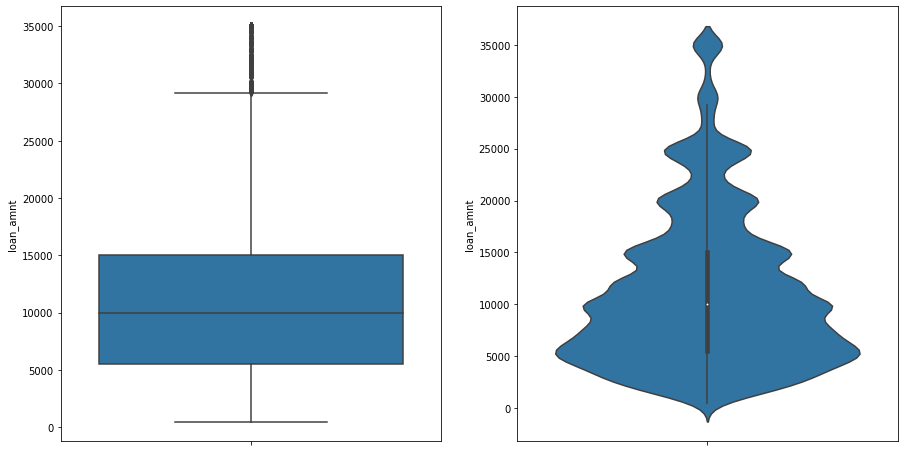

In [415]:
# Outlier Analysis
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'loan_amnt',data=loan)
plt.subplot(1, 2, 2)
sns.violinplot(y = 'loan_amnt',data=loan)
plt.show()

In [416]:
#Comments: 
#1) The distribution seems to have outliers but considering the nature of the column, it can have high range of values.
#2) Considering the mean and median values are quite close, there are not many extreme values

<AxesSubplot:xlabel='loan_amnt'>

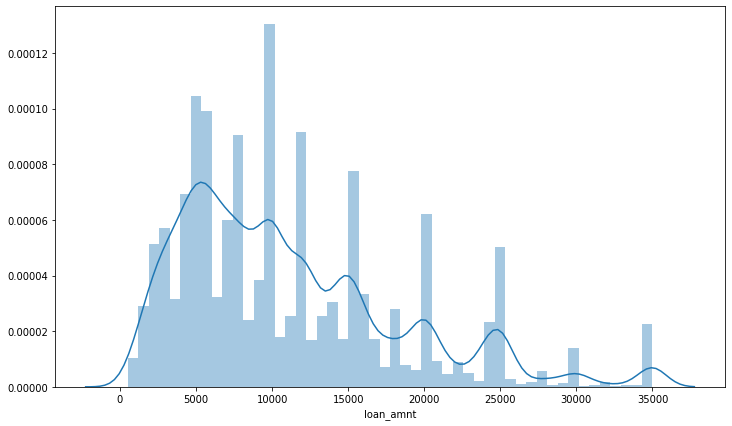

In [417]:
# Distribution plot
plt.figure(figsize=(12,7))
sns.distplot(loan.loan_amnt)

In [418]:
# Comments:    
#1)We see that the loan amount distribution is slightly right-skewed
#2)Most of the loans granted are for amount less than 15000
#3)Spikes are seen at every $5000 interval

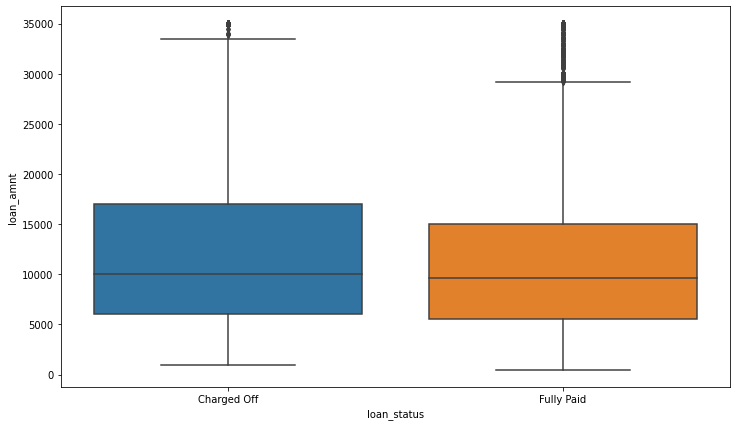

In [419]:
# 2) Segmented Univariate Analysis

loan.groupby('loan_status')['loan_amnt'].describe()

plt.figure(figsize=(12,7))
sns.boxplot(y=loan['loan_amnt'], x=loan['loan_status'], data=loan)
plt.show()

In [420]:
# The Charged off loans show higher mean loan amount values although the medians are too close. We bin the loan amount values*

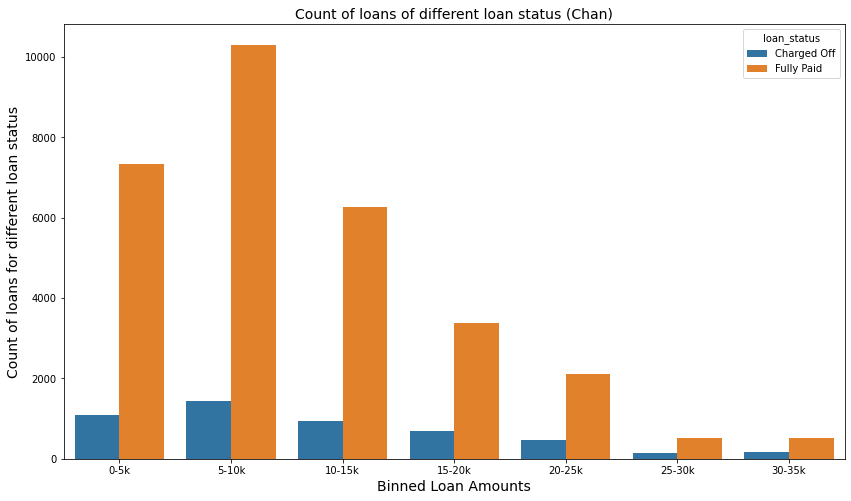

In [421]:
# Binning the loan_amnt column values
loan['loan_amnt_binned'] = pd.cut(loan['loan_amnt'],[x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

plt.figure(figsize=(14, 8))

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt_binned', y=loan.index, hue="loan_status", data=loan,estimator=lambda x: len(x))
plt.xlabel('Binned Loan Amounts',fontsize =14) 
plt.ylabel('Count of loans for different loan status',fontsize =14)
plt.title('Count of loans of different loan status (Chan)',fontsize =14)
plt.show()

In [422]:
# Since the absolute numbers do not show a clear picture, we try to plot the percentages

In [423]:
# Since we repeatedly use this plot for different variables, we define a function here
def perc_loan_chargedoff(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    
    percentages = grp.unstack() *100/cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('tab10', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [424]:
# we define another function here that will show us the log plot and the boxplot
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

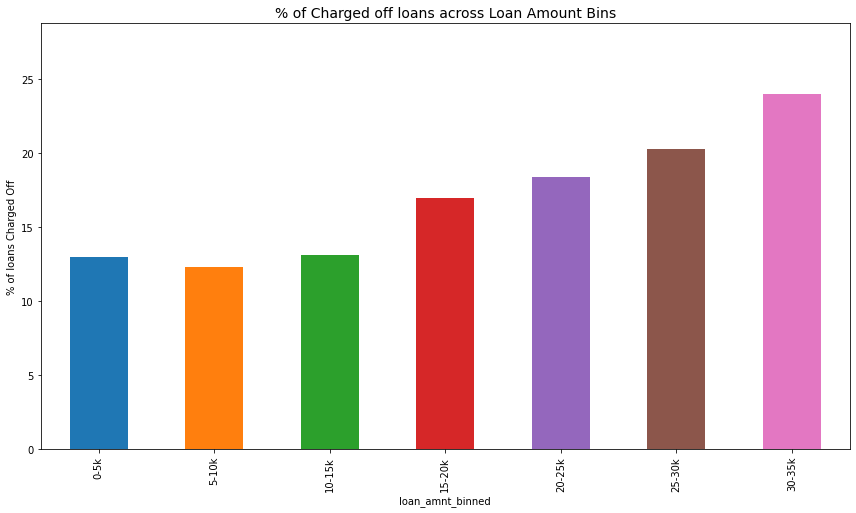

In [425]:
# using the perc_loan_chargedoff function here to plot a bar chart between loan_amt_binned and % of loans_chargedoff
plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'loan_amnt_binned')
plt.title('% of Charged off loans across Loan Amount Bins',fontsize =14)
plt.show()

In [426]:
# We can see from the plot that the percentage of Charged off loans increases as we move towards higher Loan Amount Bins. This indicates that Loans of higher loan amounts (although less in number) have higher chances of defaults.
# Thus, the Loan Amount column seems to be a strong indicator of Defaults.

In [427]:
# `term`
#1) Univariate Analysis
loan.term.value_counts()
loan.term.describe()

count     35367
unique        2
top          36
freq      26377
Name: term, dtype: object

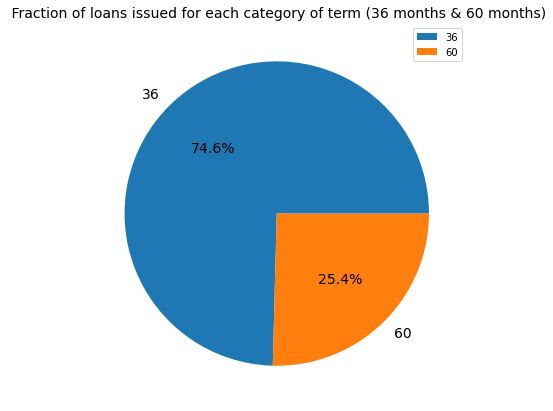

In [428]:
# 2) Segmented Univariate Analysis
# We plot a pie chart to check the share of loans for each category of terms (36 months and 60 months)
pivot1 = pd.pivot_table(loan, values=['loan_amnt'], index=['term'], 
                   aggfunc=(['count']))
pivot1.plot.pie(y='count',figsize=(7,7), autopct='%1.1f%%',fontsize =14)
plt.title(' Fraction of loans issued for each category of term (36 months & 60 months)',fontsize =14)
plt.ylabel('')
plt.show() 

In [429]:
# Now, we check the fraction of 'Charged off' loans for each term category

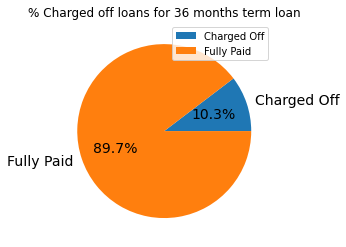

In [430]:
#For 36 months term
temp1 = loan[loan['term'] == '36']
pivot2a = pd.pivot_table(temp1, values=['loan_amnt'], index=['loan_status'], 
                   aggfunc=(['count']))

pivot2a.plot.pie(y='count', autopct='%1.1f%%',fontsize =14)
plt.title('% Charged off loans for 36 months term loan')
plt.ylabel('')
plt.show()

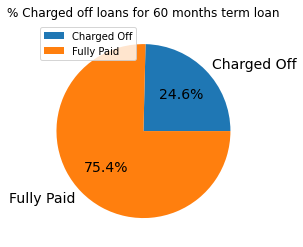

In [431]:
#For 60 months term
temp2 = loan[loan['term'] == '60']
pivot2b = pd.pivot_table(temp2, values=['loan_amnt'], index=['loan_status'], 
                   aggfunc=(['count']))

pivot2b.plot.pie(y='count', autopct='%1.1f%%',fontsize =14)
plt.title('% Charged off loans for 60 months term loan')
plt.ylabel('')
plt.show()

In [432]:
#1) Maximum loans (74.5%) are given out for 36 months ie. 3 years
#2) Among the loans given out for 36 months, just 10.3% turned out to be 'Charged Off'
#3) Among the loans given out for 60 months, 24.6% turned out to be 'Charged Off'
#4) Although the count of loans given out for 5 years is less, they show higher chances of default.'''

In [433]:
# `int_rate`
#1) Univariate Analysis
loan.int_rate.dtypes
loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

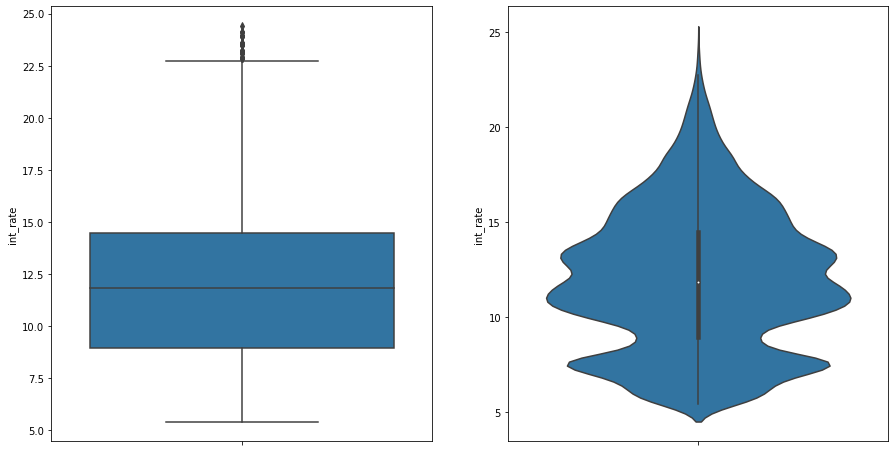

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,loan_amnt_binned
223,24250,60,23.91,519.76,G,G4,"MAll SPE, LLC",7,MORTGAGE,120000.00,...,7,0,31992,99.0,20,0.0,22206.82,16499.75,0.0,20-25k
601,12375,60,23.13,349.79,G,G2,University of Central Florida,5,RENT,40000.00,...,27,0,13768,22.5,31,0.0,8530.26,52.05,0.0,10-15k
616,22400,60,22.74,628.13,G,G1,JPMORGAN CHASE,6,RENT,85000.00,...,14,0,13773,58.7,16,0.0,26376.52,628.13,0.0,20-25k
733,24925,60,23.91,715.75,G,G4,exclusive autoline inc,4,RENT,60000.00,...,19,0,14265,98.9,26,0.0,37823.37,6543.21,0.0,20-25k
1156,29100,60,23.91,835.63,G,G4,Protiviti,0,RENT,95000.00,...,4,0,3988,99.7,22,0.0,40059.17,23356.73,0.0,25-30k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13489,15000,60,22.94,322.39,F,F5,Molisse Realty Group,3,RENT,60000.00,...,6,0,12488,86.1,13,0.0,2892.87,322.39,0.0,10-15k
13492,12000,60,24.40,348.01,G,G4,Mary Manning walsh Home,7,RENT,35775.63,...,2,0,15780,98.6,5,0.0,4777.71,696.02,0.0,10-15k
14089,21600,60,22.85,607.06,G,G3,General Dynamics,10,MORTGAGE,94000.00,...,7,0,23895,94.8,12,0.0,10212.44,608.00,0.0,20-25k
14600,35000,60,23.59,851.64,G,G5,Maricopa Integrated Health Systems,4,RENT,100000.00,...,9,0,35493,98.0,9,0.0,46829.05,17044.35,0.0,30-35k


In [434]:
# Outlier Analysis
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'int_rate',data=loan)
plt.subplot(1, 2, 2)
sns.violinplot(y = 'int_rate',data=loan)
plt.show()

loan[loan.int_rate>22.5]

<AxesSubplot:xlabel='int_rate'>

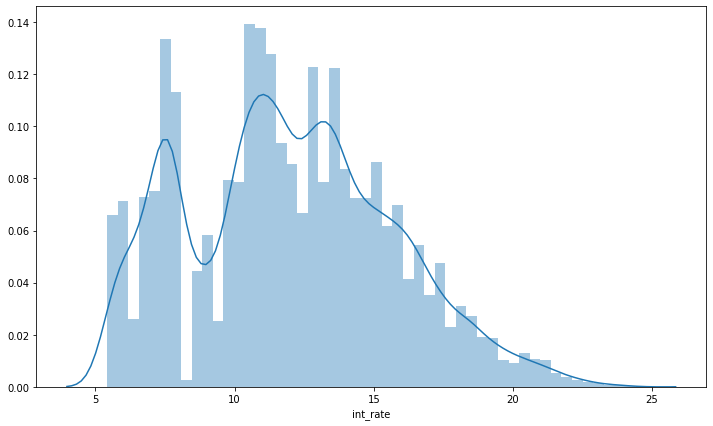

In [435]:
# Distribution plot
plt.figure(figsize=(12,7))
sns.distplot(loan.int_rate)

In [436]:
#1) The distribution has very close values for mean(11.98%) and median(11.83%%) with few (63) extreme high values but we choose to retain them.
#2) The column shows a range of 5.42% to 24.42%.

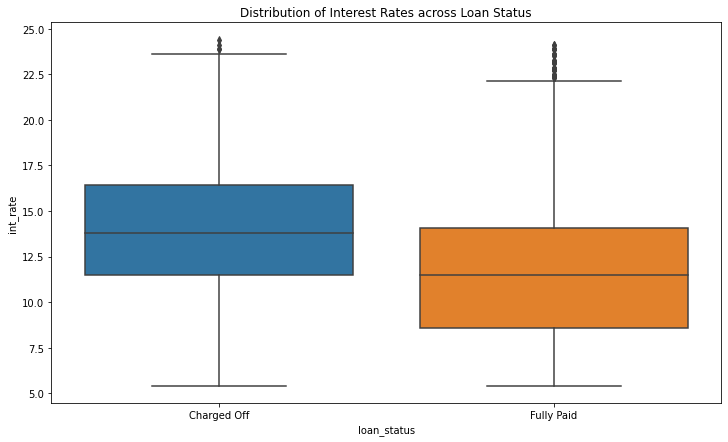

In [437]:
# 2) Segmented Univariate Analysis

loan.groupby('loan_status')['int_rate'].describe()

plt.figure(figsize=(12,7))
sns.boxplot(y=loan['int_rate'], x=loan['loan_status'], data=loan)
plt.title('Distribution of Interest Rates across Loan Status')
plt.show()

In [438]:
# We can see that interest rates for the Charged off loans are comparatively higher than that of the Fully Paid loans. This higher rate can be due to perceived risk associated with such loans.

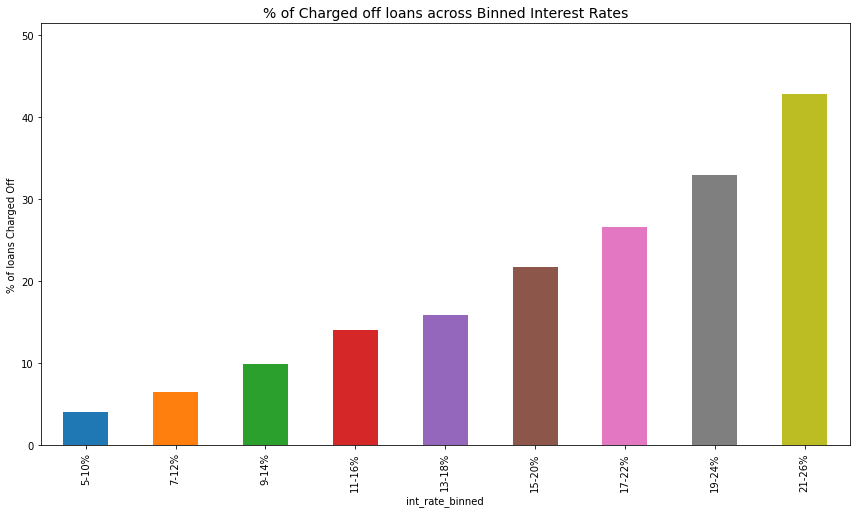

In [439]:
# Binning the 'int_rate' column values
loan['int_rate_binned'] = pd.cut(loan['int_rate'],[x for x in range(5, 25, 2)], labels=[str(round(x,0))+'-'+str(round(x,0)+5)+'%' for x in range (5, 23,2)])

loan['int_rate_binned']

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'int_rate_binned')
plt.title('% of Charged off loans across Binned Interest Rates',fontsize =14)
plt.show()

In [440]:
# We see that for higher interest rate bracket, the percentage of Charged off loans are high.

In [441]:
# `installment`
#1) Univariate Analysis
loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

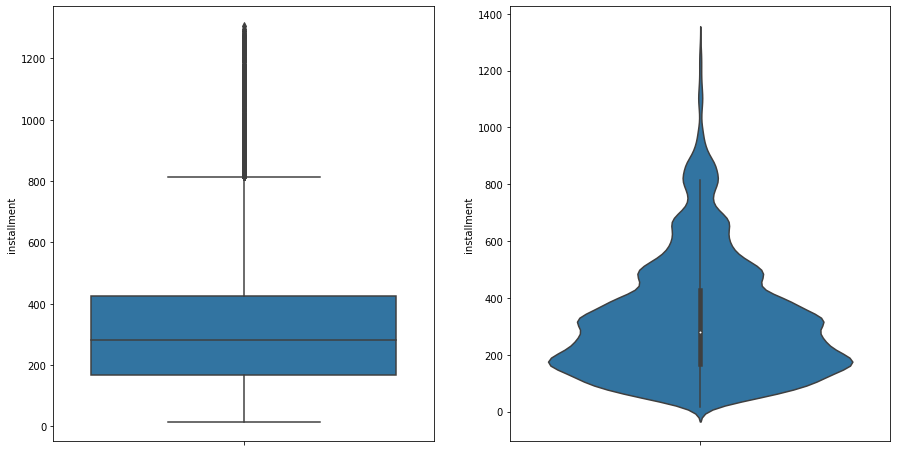

In [442]:
# Outlier Analysis
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'installment',data=loan)
plt.subplot(1, 2, 2)
sns.violinplot(y = 'installment',data=loan)
plt.show()

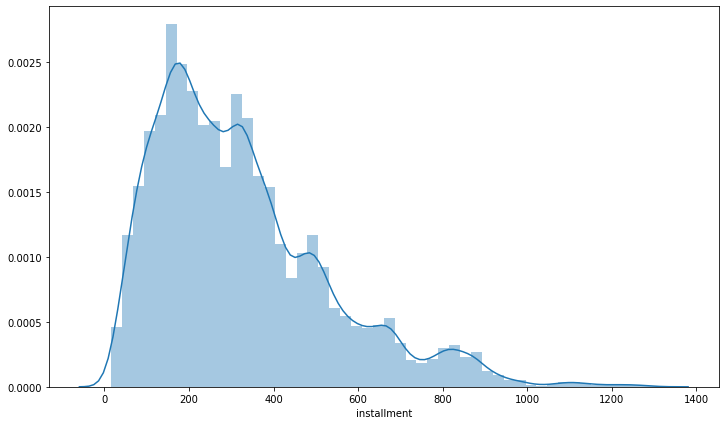

In [443]:
# Distribution plot
plt.figure(figsize=(12,7))
sns.distplot(loan.installment)
plt.show()

In [444]:
# 1) The distribution has a big range but the mean and median are comparable.

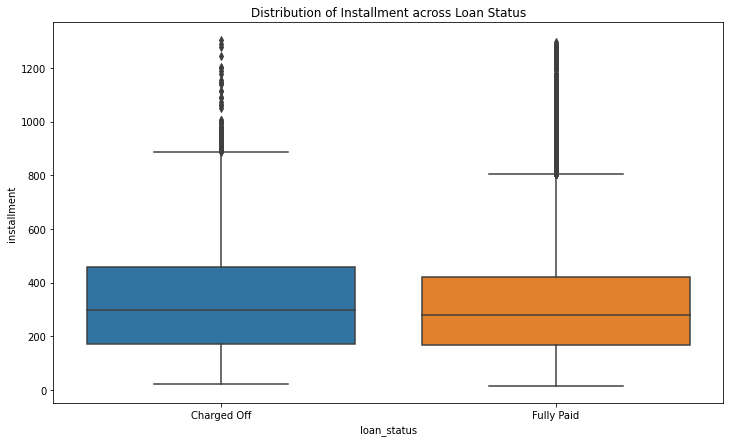

In [445]:
# 2) Segmented Univariate Analysis

loan.groupby('loan_status')['installment'].describe()

plt.figure(figsize=(12,7))
sns.boxplot(y=loan['installment'], x=loan['loan_status'], data=loan)
plt.title('Distribution of Installment across Loan Status')
plt.show()

In [446]:
# We can see that median installment values for the Charged off loans are marginally higher than that of the Fully Paid loans. We can further check the distribution of installments for only the 'Charged off' loans.

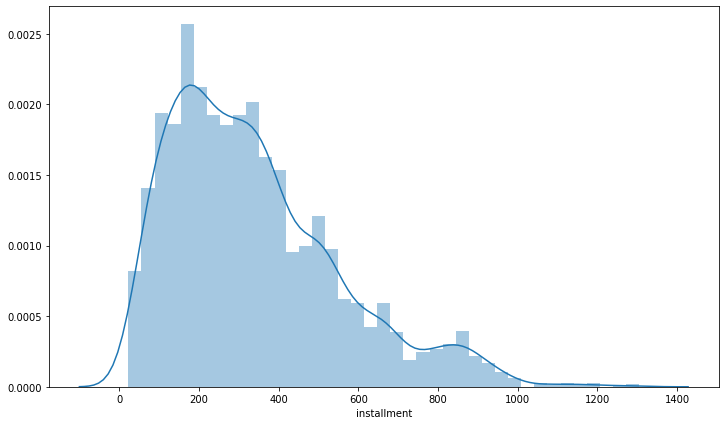

In [447]:
# We check the installment distribution for each loan status
plt.figure(figsize=(12,7))
ff = loan[loan['loan_status'] == 'Charged Off']
sns.distplot(ff.installment)
plt.show()

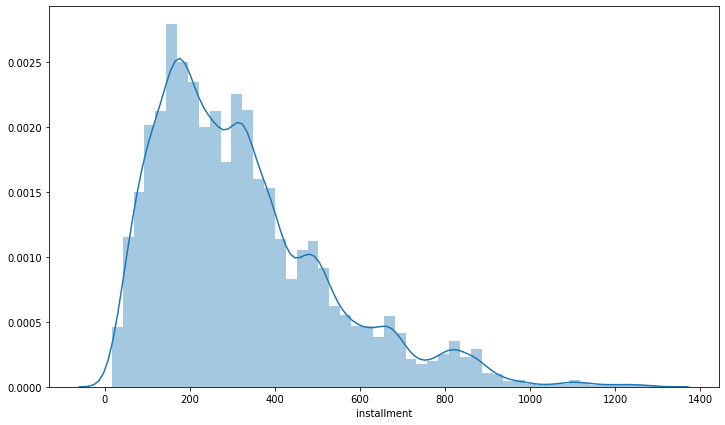

In [448]:
plt.figure(figsize=(12,7))
gg = loan[loan['loan_status'] == 'Fully Paid']
sns.distplot(gg.installment)
plt.show()

In [449]:
# We dont see any significant difference in the plots. Thus, Installment ddoesnt seem to be an important criteria

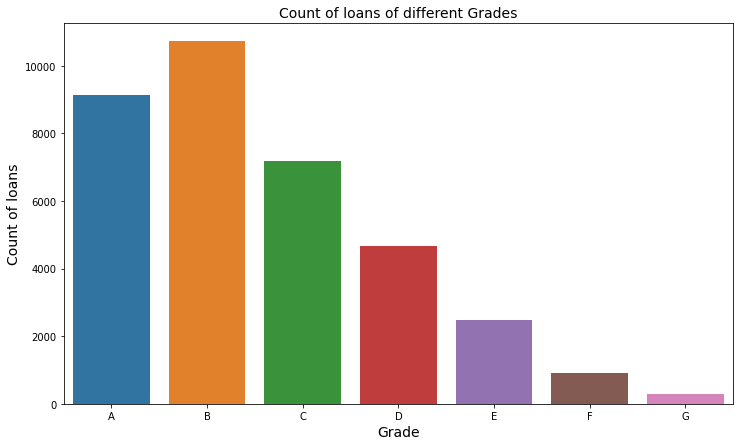

In [450]:
# `grade`

#1) Univariate Analysis

loan.grade.value_counts()

plt.figure(figsize=(12,7))

sns.countplot(loan['grade'], order=sorted(loan.grade.unique()))
plt.xlabel('Grade',fontsize =14) 
plt.ylabel('Count of loans',fontsize =14)
plt.title('Count of loans of different Grades',fontsize =14)
plt.show()

In [451]:
#1) Number of loans of Grade B is the highest followed by Grade A. These Grades may indicate safer loans, hence the frequency. We can explore this in the Segmented Univariate Analysis.
#2) Lowest Lon count is shown by Grade G.
#We can explore this further in the Segmented Univariate Analysis.

Text(0.5, 1.0, 'Count of loans of different Loan Status across Grades')

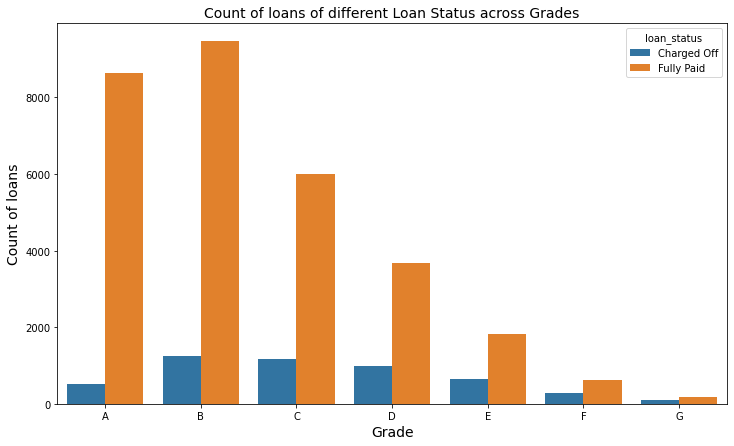

In [452]:
# 2) Segmented Univariate Analysis
# We can plot the number of loans of the two loan status for each Grade.
plt.figure(figsize=(12,7))
sns.barplot(x='grade', y=loan.index, hue="loan_status", data=loan,estimator=lambda x: len(x),order=sorted(loan.grade.unique()))
plt.xlabel('Grade',fontsize =14) 
plt.ylabel('Count of loans',fontsize =14)
plt.title('Count of loans of different Loan Status across Grades',fontsize =14)

In [453]:
# Both Charged off and Fully Paid loan frequencies follow a similar pattern across Grades. Plotting % of Charged off loans per Grade might give a clearer picture.

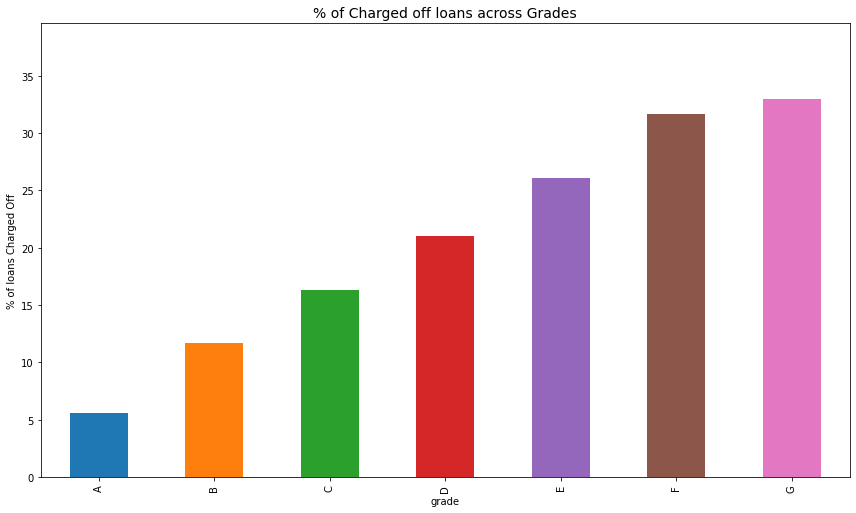

In [454]:
plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'grade')
plt.title('% of Charged off loans across Grades',fontsize =14)
plt.show()

In [455]:
#1) We see that % of Charged off loans is highest for Grade G, followed by Grade F and E. Thus, these grades indicates the riskiest loans.
#2) We see that % of Charged off loans is lowest for Grade A, followed by B and C. Thus, these grades indicate safer loans.
#3) We can conclude that the grading system being used is indeed a very good indicator of defaults.

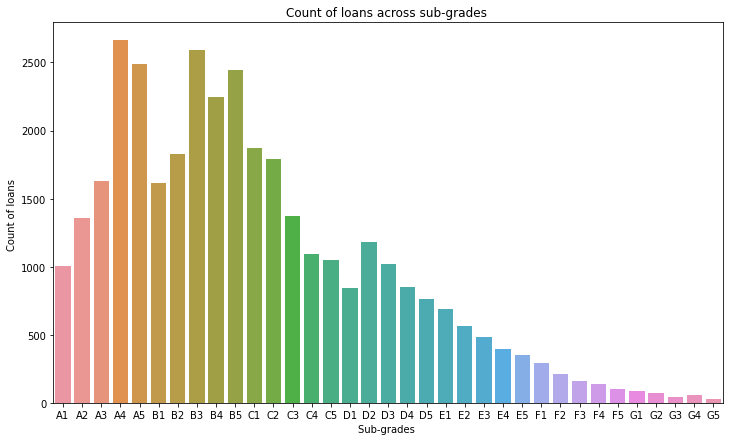

In [456]:
# `sub_grade`

#1) Univariate Analysis

plt.figure(figsize=(12,7))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()))
plt.title('Count of loans across sub-grades ')
plt.xlabel('Sub-grades ')
plt.ylabel('Count of loans ')
plt.show()

In [457]:
# Subgrades A4 and B3 have the highest counts.

In [458]:
#1) It will interesting to look at the % of Charged off loans for each subgrade. 
#2) Also, we can also plot the same only for the lowest Grade ie. G.

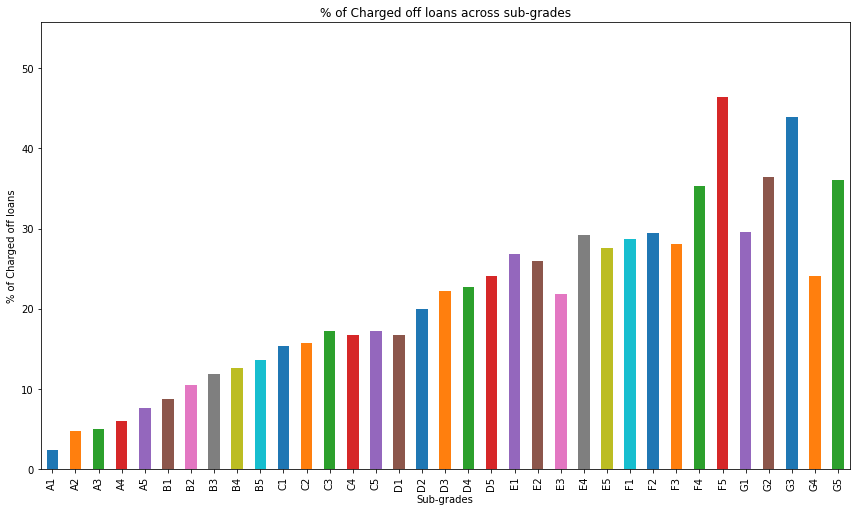

In [459]:
# 2) Segmented Univariate Analysis

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'sub_grade')
plt.title('% of Charged off loans across sub-grades')
plt.xlabel('Sub-grades')
plt.ylabel('% of Charged off loans')
plt.show()

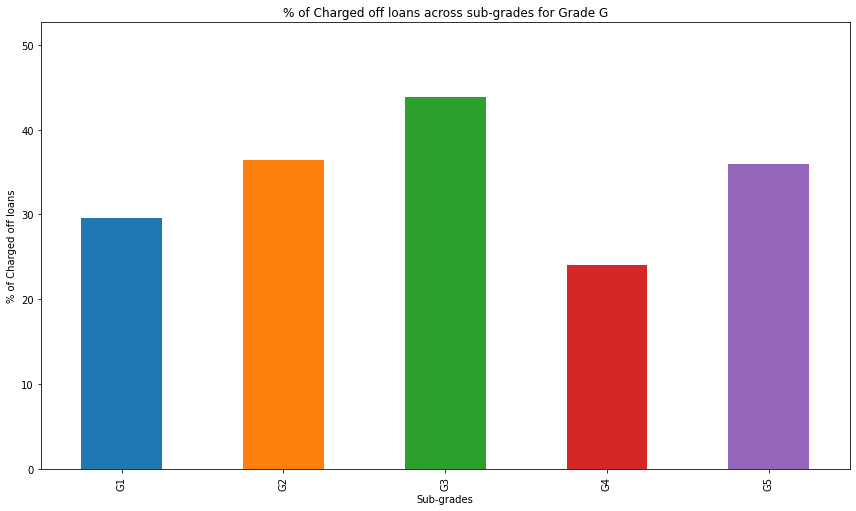

In [460]:
sub_grade_temp1 = loan[loan['grade'] == 'G']
plt.figure(figsize=(12,7))
perc_loan_chargedoff(sub_grade_temp1 , 'sub_grade')
plt.title('% of Charged off loans across sub-grades for Grade G')
plt.xlabel('Sub-grades')
plt.ylabel('% of Charged off loans')
plt.show()

In [461]:
#1) We see that the G3 sub-grade showed the highest percentage of Charged off loans.
#Grade and Sub grade do seem to be critical columns for determining Defaulters.

In [462]:
# `emp_title`
#1) Univariate Analysis
loan['emp_title'].value_counts()

US Army                       128
Bank of America               106
IBM                            65
AT&T                           57
Kaiser Permanente              55
                             ... 
Bloomberg L.P.                  1
Self Employed Consultant        1
U. S Postal Service             1
Smith & Warren                  1
Linfield Christian Schools      1
Name: emp_title, Length: 27414, dtype: int64

In [463]:
# We check the employers with 10 highest loan records
emp_title_top10 = loan['emp_title'].value_counts().head(10)
emp_title_top10

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64

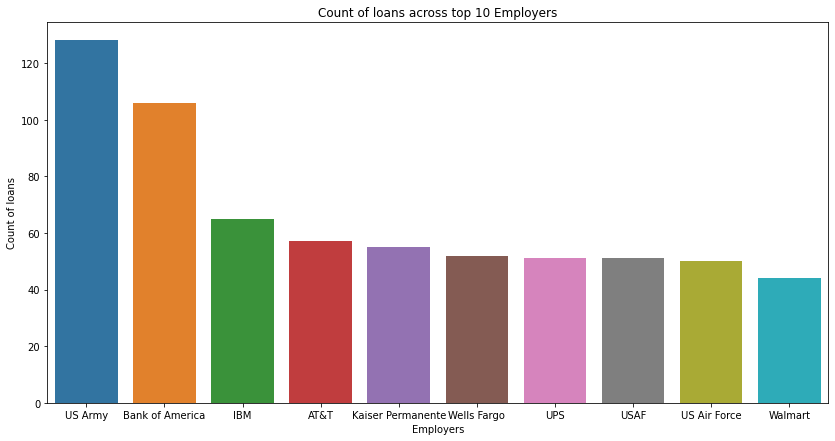

In [464]:
plt.figure(figsize=(14,7))
sns.barplot(x=emp_title_top10.index, y=emp_title_top10.values)
plt.title('Count of loans across top 10 Employers')
plt.ylabel('Count of loans')
plt.xlabel('Employers')
plt.show()

In [465]:
# Maximum number of loans are given out to employees of US Army followed by those of Bank of America

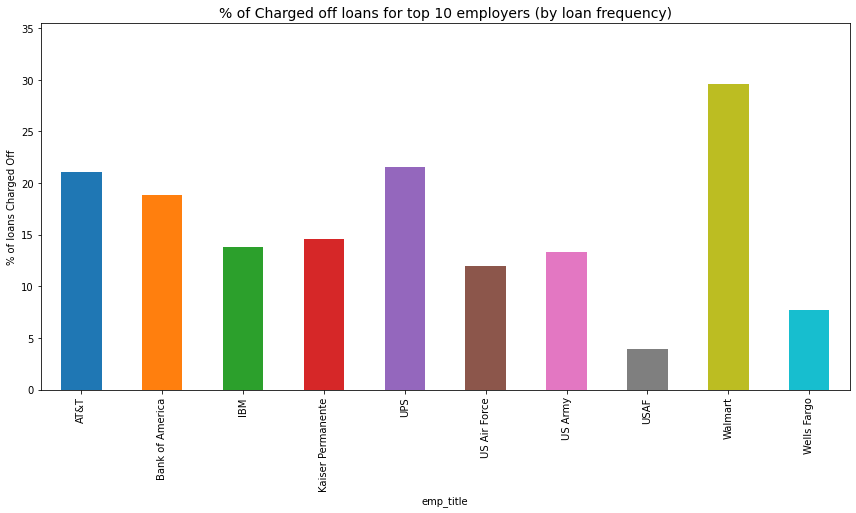

In [466]:
# 2) Segmented Univariate Analysis

# For the above 10 employers, we can check % of Charged off loans

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan[loan['emp_title'].isin(emp_title_top10.index.values)], 'emp_title')
plt.title('% of Charged off loans for top 10 employers (by loan frequency)',fontsize =14)
plt.show()

In [467]:
# We can see that the % of Charged off loans is highest for Walmart, followed by UPS and AT&T. They should be careful while lending out to employers of these companies.

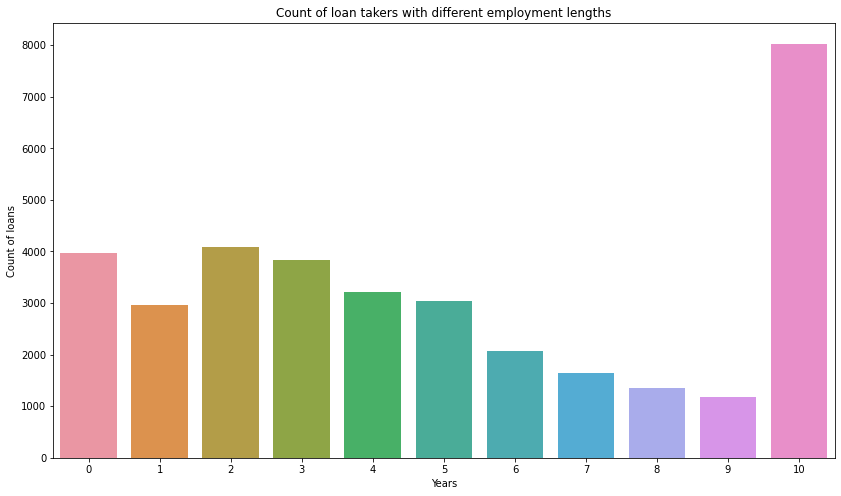

In [468]:
# `emp_length`

#1) Univariate Analysis

loan.emp_length.value_counts(normalize=True)

plt.figure(figsize=(14,8))
sns.countplot(loan['emp_length'], order=sorted(loan.emp_length.unique()))
plt.title('Count of loan takers with different employment lengths')
plt.ylabel('Count of loans')
plt.xlabel('Years')
plt.show()

In [469]:
# Maximum loan takers have Employment length of more than 10 years.

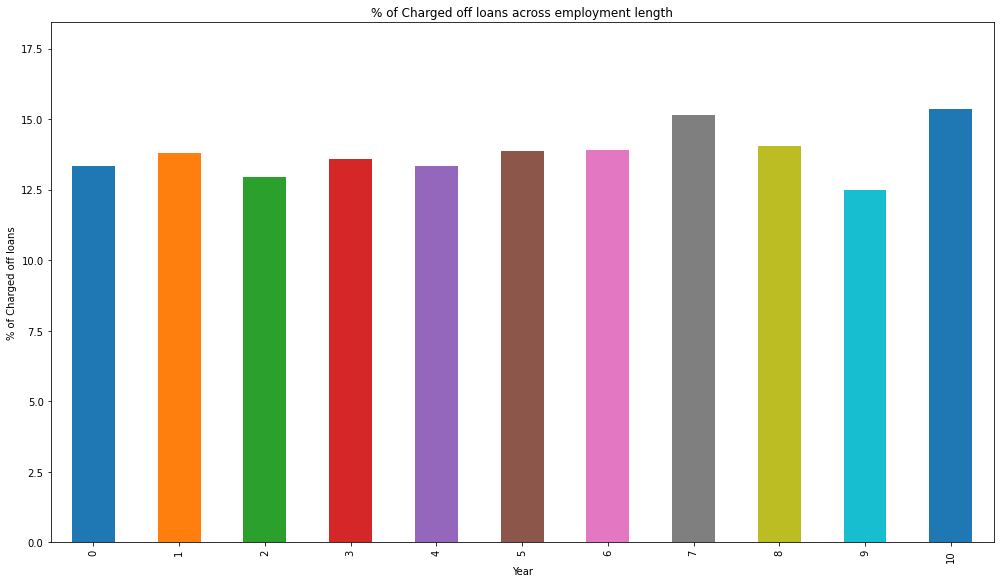

In [470]:
### 2) Segmented Univariate Analysis

# We can check the % of Charged off loans for loan takers with different employent length
plt.figure(figsize=(14,8))
perc_loan_chargedoff(loan, 'emp_length')
plt.title('% of Charged off loans across employment length')
plt.xlabel('Year')
plt.ylabel('% of Charged off loans')
plt.show()

In [471]:
# From the plot, we can say that employement length doesnt have much effect on loan defaults. The difference in percentages is not that significant.

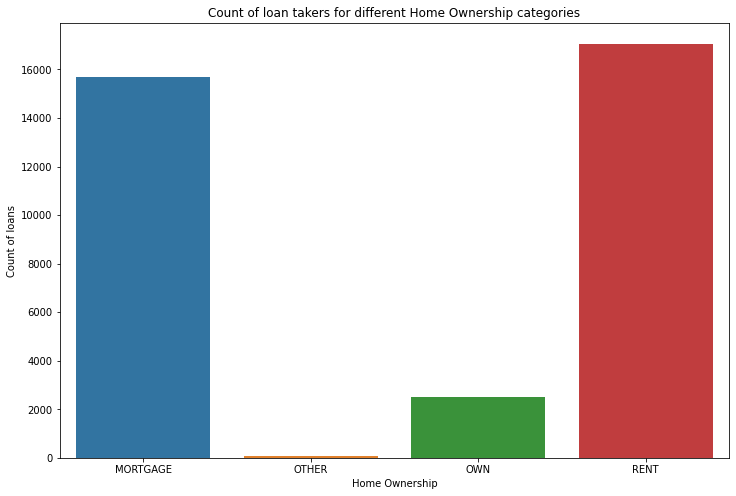

In [472]:
# `home_ownership`

#1) Univariate Analysis

loan['home_ownership'].value_counts()

plt.figure(figsize=(12,8))
sns.countplot(loan['home_ownership'], order=sorted(loan.home_ownership.unique()))
plt.title('Count of loan takers for different Home Ownership categories')
plt.ylabel('Count of loans')
plt.xlabel('Home Ownership')
plt.show()

In [473]:
# Majority of loan takers belong to Rent and Mortgage category. Very few belong to 'Own' category.

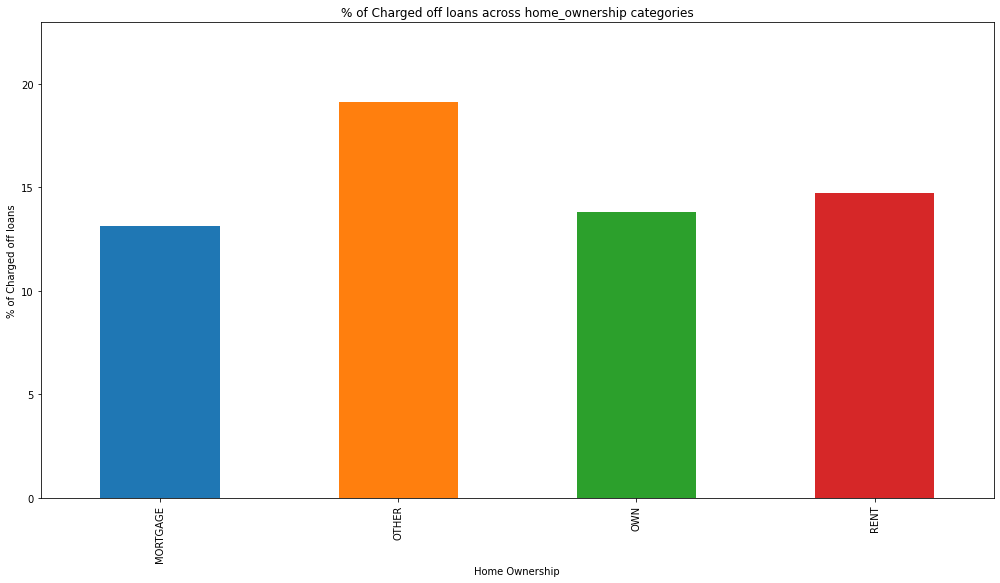

In [474]:
# 2) Segmented Univariate Analysis

# We can check the % of Charged off loans for loan takers with different category of Home Ownership
plt.figure(figsize=(14,8))
perc_loan_chargedoff(loan, 'home_ownership')
plt.title('% of Charged off loans across home_ownership categories')
plt.xlabel('Home Ownership')
plt.ylabel('% of Charged off loans')
plt.show()

In [475]:
# The categories which showed the majority of loan counts do not show any significant difference in % of Charged off loans. 

In [476]:
# We can conclude that Home Ownership is not a critical column for determining defaulters.

In [477]:
# `annual_inc`

# 1) Univariate Analysis

loan.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

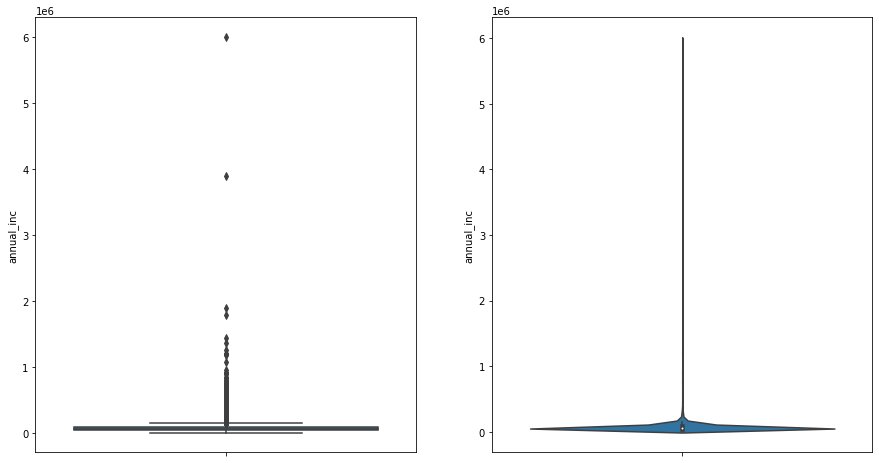

In [478]:
# Outlier Analysis
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'annual_inc',data=loan)
plt.subplot(1, 2, 2)
sns.violinplot(y = 'annual_inc',data=loan)
plt.show()

In [479]:
# 1) Looking at plots , we can conclude that Outlier treatment will be needed here for further analysis. 
# 2) We see that there is not much difference between the mean (~69k) and median (60k).
# We cant just remove the outliers before further analysis. We will remove values greater and less than 3 standard deviations from the mean.

In [480]:
# Calculate value of 3 sigma
3*loan.annual_inc.std()

loan_limit_df =loan[np.abs(loan.annual_inc-loan.annual_inc.mean()) <= (3*loan.annual_inc.std())]
loan_limit_df.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

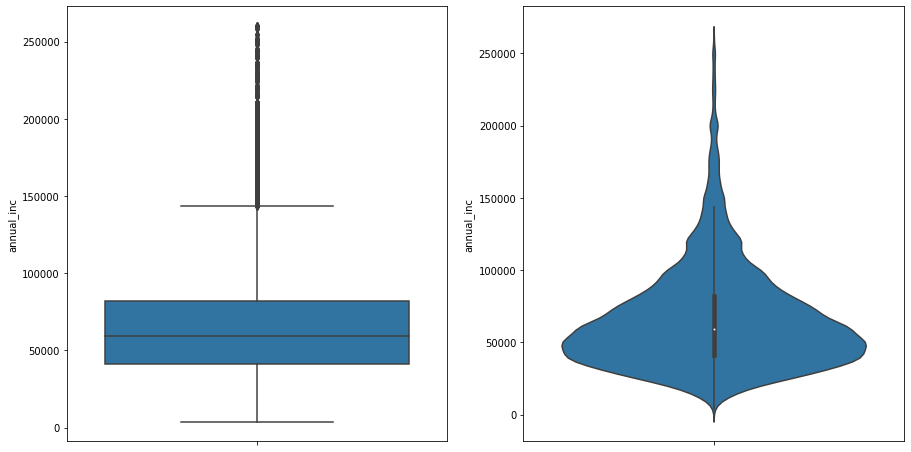

In [481]:
# Check the distribution of Annual Income again

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'annual_inc',data=loan_limit_df)
plt.subplot(1, 2, 2)
sns.violinplot(y = 'annual_inc',data=loan_limit_df)
plt.show()

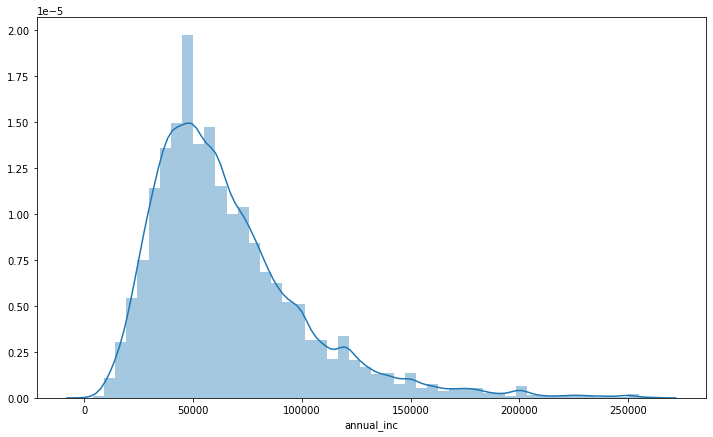

In [482]:
# Distribution plot
plt.figure(figsize=(12,7))
sns.distplot(loan_limit_df.annual_inc)

plt.show()

In [483]:
# We see that both median and mean value is near 60000.

In [484]:
# 2) Segmented Univariate Analysis

loan_limit_df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4918.0,60928.383253,33378.705777,4080.0,38400.0,54000.0,75000.0,254616.0
Fully Paid,30204.0,67122.911395,36047.259863,4000.0,42000.0,60000.0,83062.5,260000.0


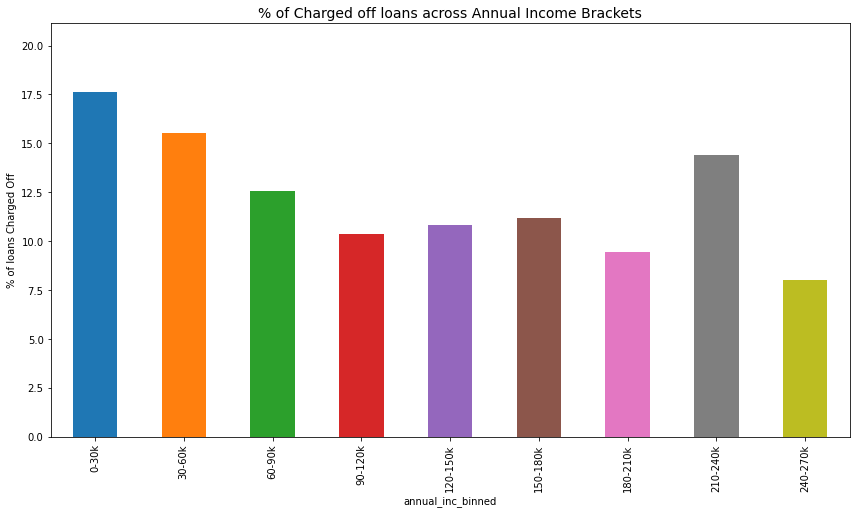

In [485]:
# Binning the lannual_inc column values
loan['annual_inc_binned'] = pd.cut(loan['annual_inc'],[x for x in range(0, 300000, 30000)], labels=[str(x)+'-'+str(x+30)+'k' for x in range (0, 270, 30)])

loan.annual_inc_binned

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'annual_inc_binned')
plt.title('% of Charged off loans across Annual Income Brackets',fontsize =14)
plt.show()

In [486]:
# 1) The highest % of Charged off loans are seen for the lowest Income bracket. 
# 2) On the higher end, high Charge percentage is seen for the income bracket of 210-240K.

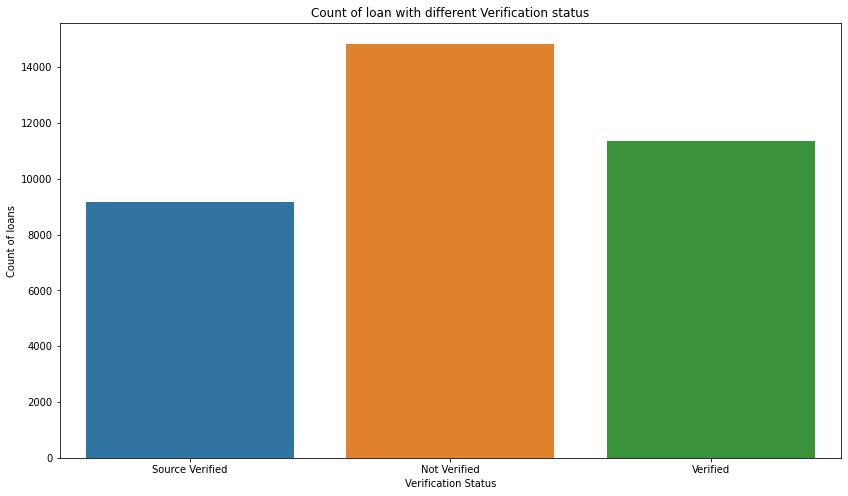

In [487]:
# `verification_status`

# 1) Univariate Analysis

loan.verification_status.value_counts()

plt.figure(figsize=(14,8))
sns.countplot(loan['verification_status'])
plt.title('Count of loan with different Verification status')
plt.ylabel('Count of loans')
plt.xlabel('Verification Status')
plt.show()

In [488]:
# We can see that the count of loans that are 'Not verified' are more than 'Verified' and 'Source Verified'. We now attempt to check the % Charge off loans for each category.

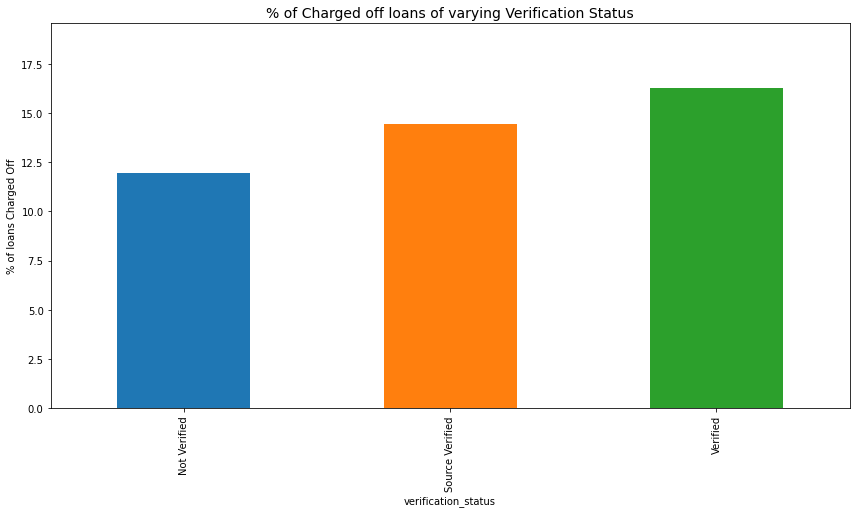

In [489]:
# 2) Segmented Univariate Analysis

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'verification_status')
plt.title('% of Charged off loans of varying Verification Status',fontsize =14)
plt.show()

In [490]:
# We see that the % is comparatively low for 'Not verified' category. hence we cannot say that non-verified loans particularly lead to greater Charge offs

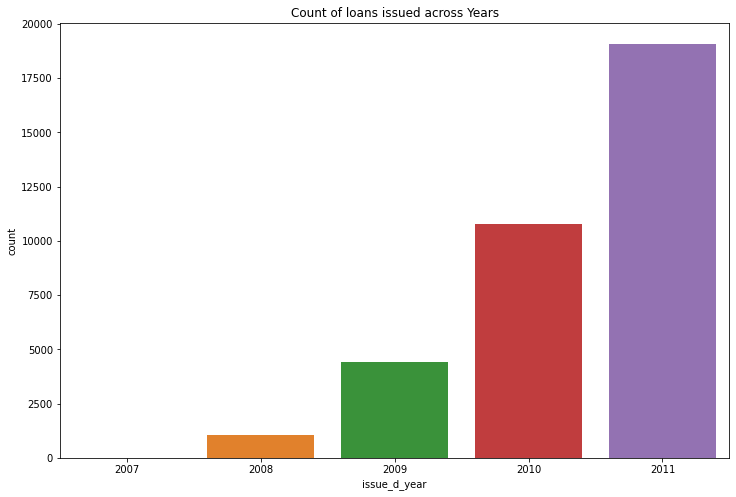

In [491]:
# `issue_d`

# 1) Univariate Analysis

# We can extract the 'month' and 'year' from the data before analysis
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

plt.figure(figsize=(12,8))

sns.countplot(loan['issue_d_year'], order=sorted(loan.issue_d_year.unique()))
plt.title('Count of loans issued across Years')

plt.show()

Text(0, 0.5, 'Loan count')

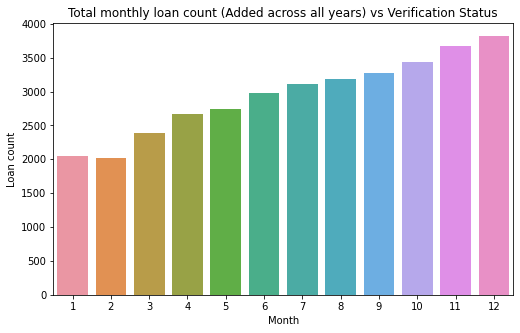

In [492]:
# We now plot average loan issued during each month

plt.figure(figsize=(28,5))
plt.subplot(1, 3, 1)
sns.countplot(loan['issue_d_month'], order=sorted(loan.issue_d_month.unique()))
plt.title('Total monthly loan count (Added across all years) vs Verification Status')
plt.xlabel('Month')
plt.ylabel('Loan count')

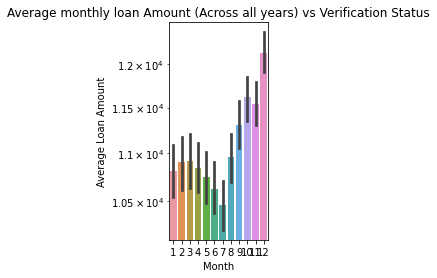

In [493]:
plt.subplot(1, 3, 2)
sns.barplot(x='issue_d_month', y='loan_amnt', data=loan, estimator=np.mean)
plt.yscale('log')
plt.title('Average monthly loan Amount (Across all years) vs Verification Status')
plt.xlabel('Month')
plt.ylabel('Average Loan Amount')
plt.show()

In [494]:
#1) Over the years from 2007 to 2011, the number of loans given out by Lending Club has been increasing every year.
#2) The total number of loan provided per month (added across all years).
#3) The average monthly loan amount (across all years) is seen to be highest for December and lowest for July.

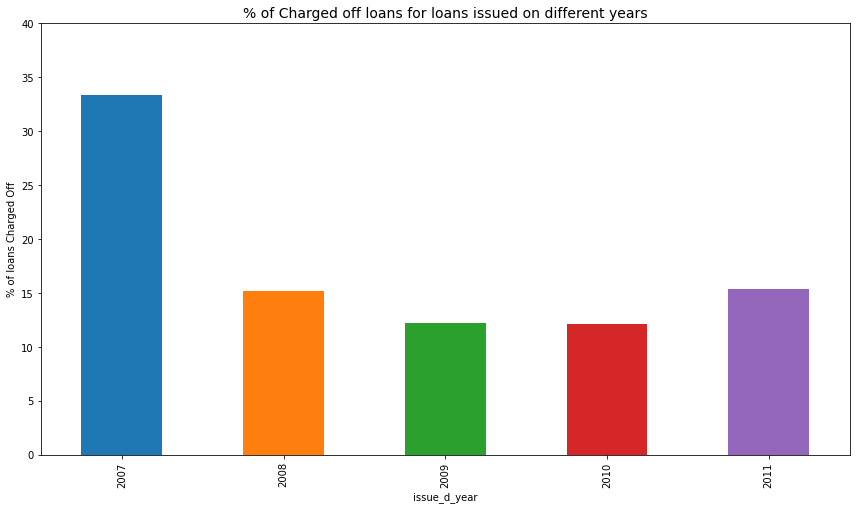

In [495]:
### 2) Segmented Univariate Analysis

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'issue_d_year')
plt.title('% of Charged off loans for loans issued on different years',fontsize =14)
plt.show()

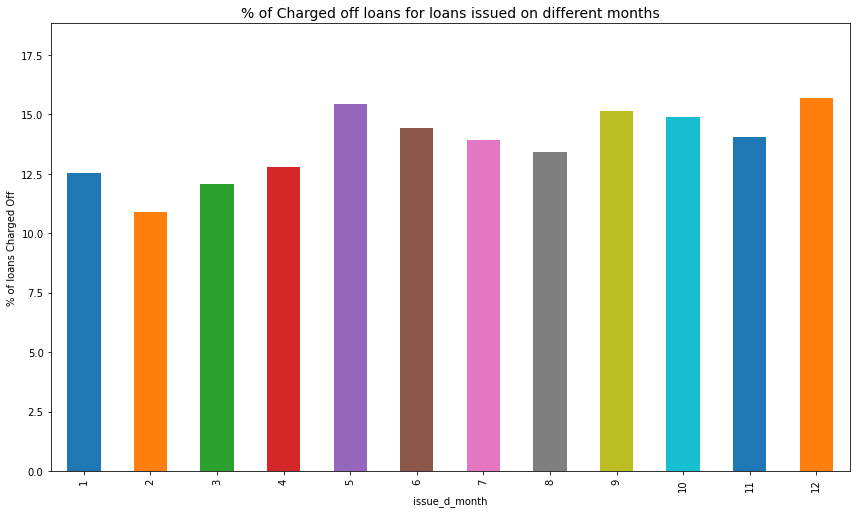

In [496]:
plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'issue_d_month')
plt.title('% of Charged off loans for loans issued on different months',fontsize =14)
plt.show()

In [497]:
#1) We do not see any significant difference in the % of Charged off loans issued during different years.(2007 value can be ignored as the number of loans issued during 2007 were very less.)
#2) We do not see any significant difference in the % of Charged off loans issued during different months.
# We can infer that issue date is not a critical factor for determining defaulters.

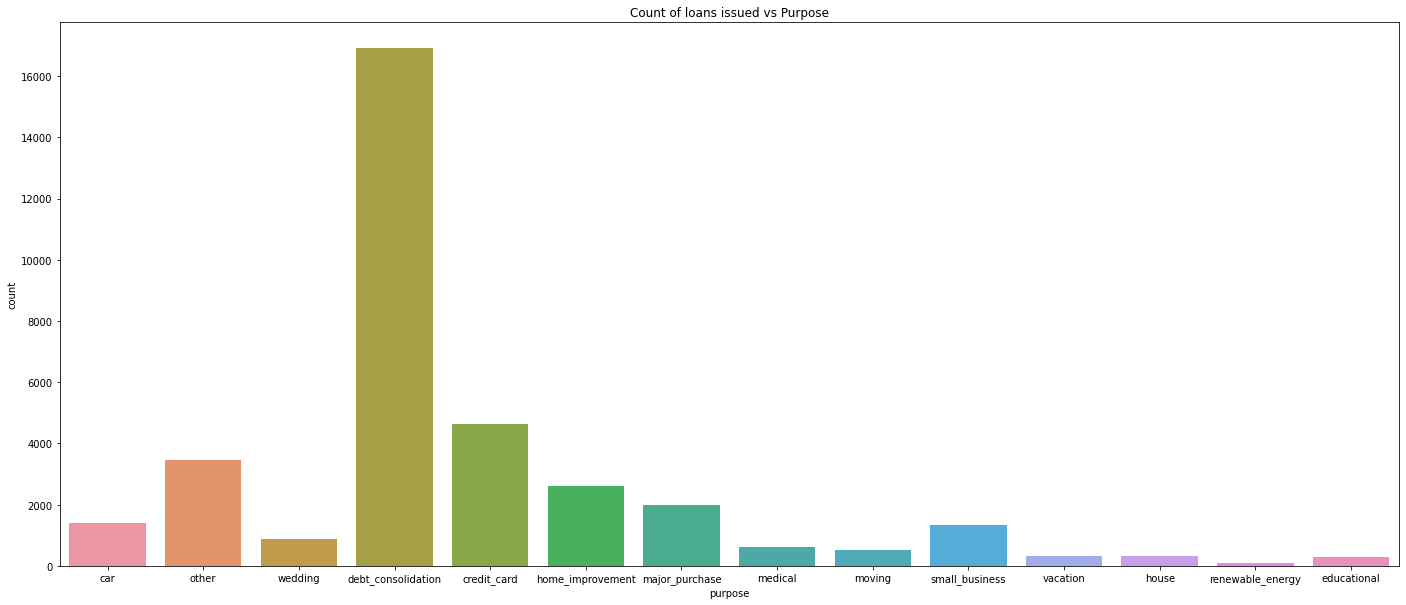

In [498]:
# `purpose`

# 1) Univariate Analysis

loan.purpose.value_counts()

plt.figure(figsize=(24,10))
sns.countplot(loan['purpose'])
plt.title('Count of loans issued vs Purpose')
plt.show()

In [499]:
# Debt Consolidation is highest purpose for seeking loan*

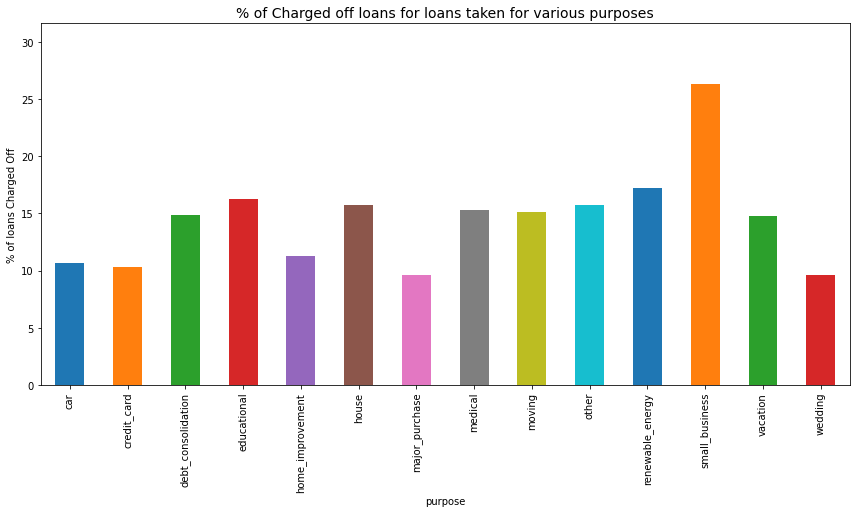

In [500]:
# 2) Segmented Univariate Analysis

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'purpose')
plt.title('% of Charged off loans for loans taken for various purposes',fontsize =14)
plt.show()

In [501]:
# The loans taken for Small business show higher Charge off. But, the number of loans taken for Small business is very less. Apart from that the other purpose categories do not show any significant variation in % charge off.

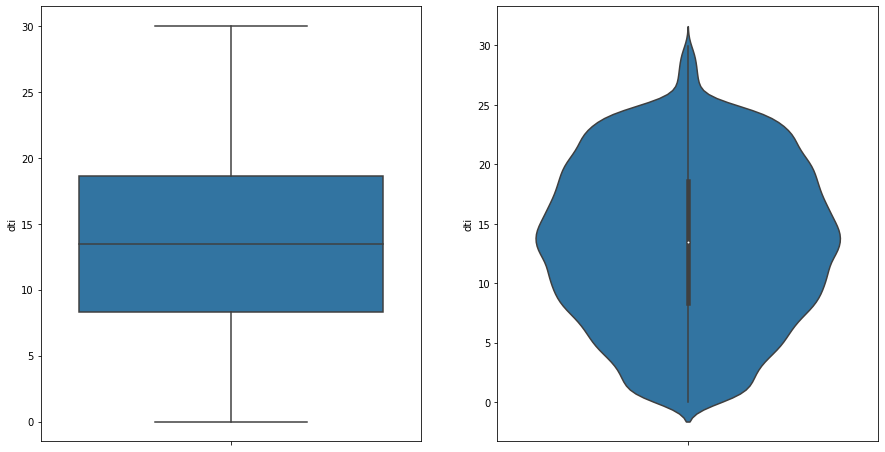

In [502]:
# `dti`

# 1) Univariate Analysis

loan.dti.describe()

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'dti',data=loan)
plt.subplot(1, 2, 2)
sns.violinplot(y = 'dti',data=loan)
plt.show()

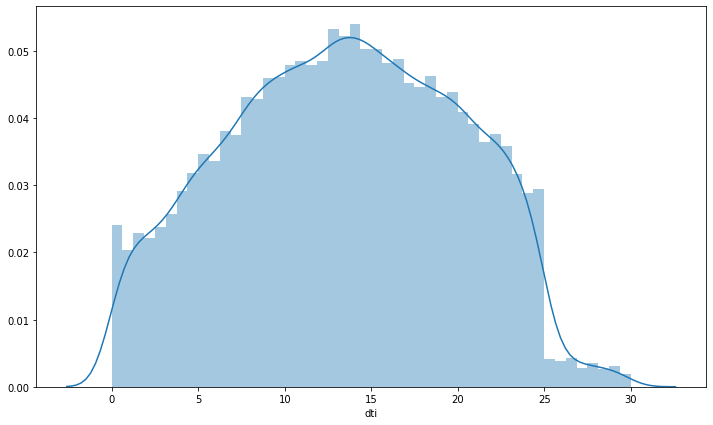

In [503]:
# Distribution plot
plt.figure(figsize=(12,7))
sns.distplot(loan.dti)
plt.show()

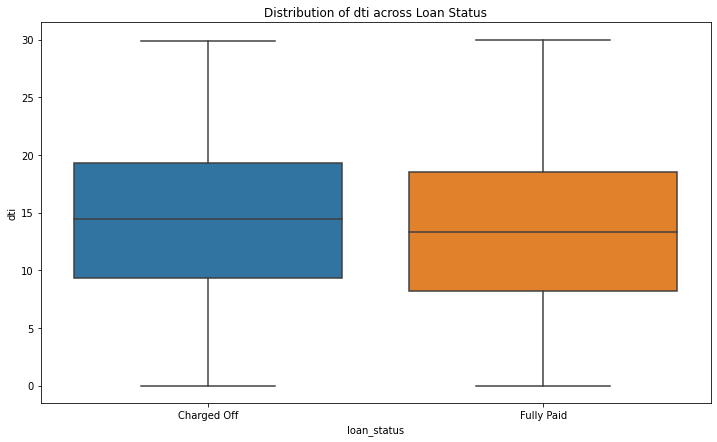

In [504]:
# 2) Segmented Univariate

loan.groupby('loan_status')['dti'].describe()

plt.figure(figsize=(12,7))
sns.boxplot(y=loan['dti'], x=loan['loan_status'], data=loan)
plt.title('Distribution of dti across Loan Status')
plt.show()

In [505]:
# We can see that the dti values are little higher for Charged off loans. We further attempt to analyse the % of Charge off for Binned dti values

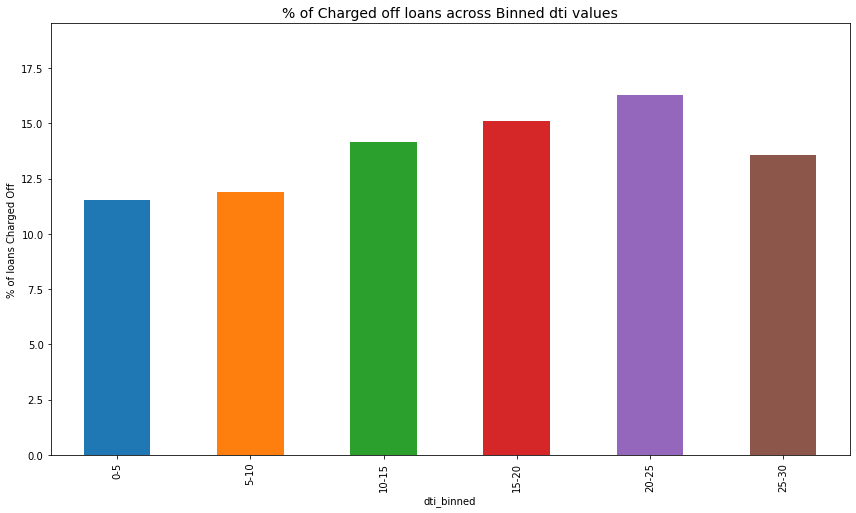

In [506]:
# Binning the 'dti' column values
loan['dti_binned'] = pd.cut(loan['dti'],[x for x in range(0, 35, 5)], labels=[str(round(x,0))+'-'+str(round(x,0)+5) for x in range (0, 30, 5)])

loan['dti_binned'] 

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'dti_binned')
plt.title('% of Charged off loans across Binned dti values',fontsize =14)
plt.show()

In [507]:
#1) We see that the % of Charged off loans increases as we move from lower to higher dti value.
#We can conclude that dti is a strong indicator for determining defaulter

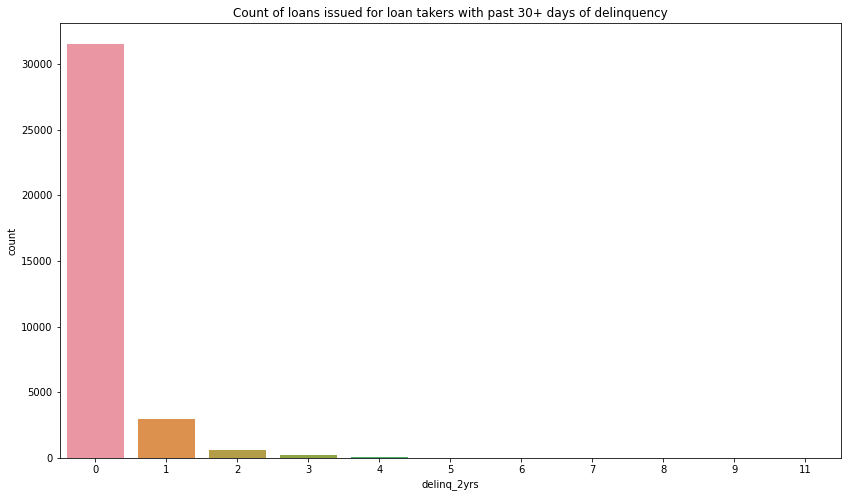

In [508]:
# `delinq_2yrs`

# 1) Univariate Analysis

loan.delinq_2yrs.value_counts(normalize=True)

plt.figure(figsize=(14,8))
sns.countplot(loan['delinq_2yrs'])
plt.title('Count of loans issued for loan takers with past 30+ days of delinquency')
plt.show()

In [509]:
# We can infer that Lending Club mostly do not issue loans to those with past deliquencies. At most 1 delinquency event is considered in some cases. Fore delinquencies more than 1, they rarely issue loans.

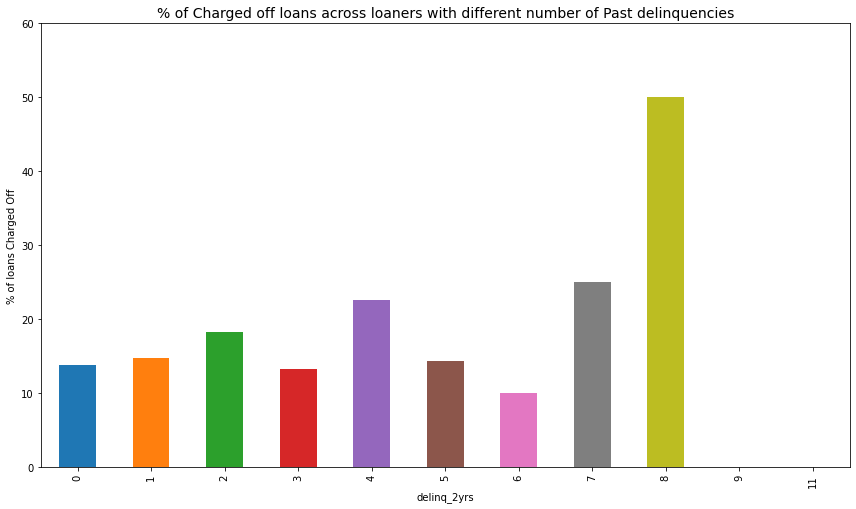

In [510]:
# 2) Segmented Univariate

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'delinq_2yrs')
plt.title('% of Charged off loans across loaners with different number of Past delinquencies',fontsize =14)
plt.show()

In [511]:
# Overall the chances of defaults increase with increase in number of past delinquencies.

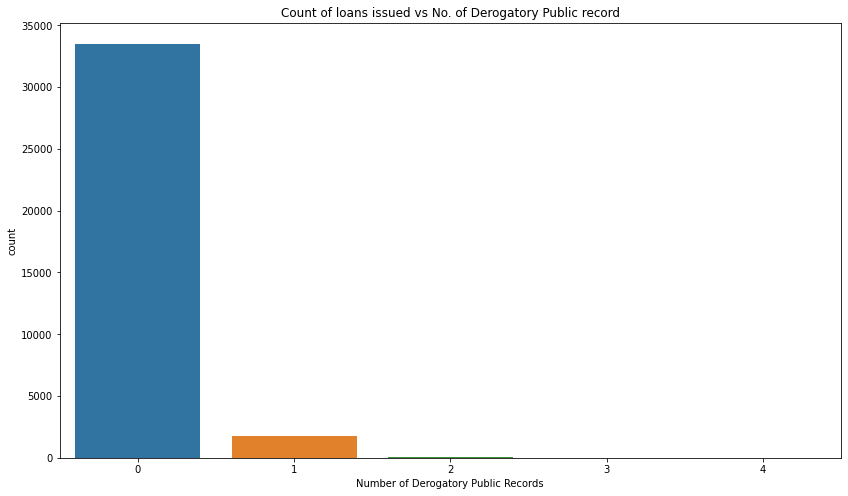

In [512]:
# `pub_rec`

# 1) Univariate Analysis 

loan.pub_rec.value_counts(normalize=True)

plt.figure(figsize=(14,8))
sns.countplot(loan['pub_rec'])
plt.title('Count of loans issued vs No. of Derogatory Public record')
plt.xlabel('Number of Derogatory Public Records')
plt.show()

In [513]:
# Lending club mostly issue loans to those who have no Derogatory Public Records. At most 1 such record is considered in some cases but rarely more than 1.

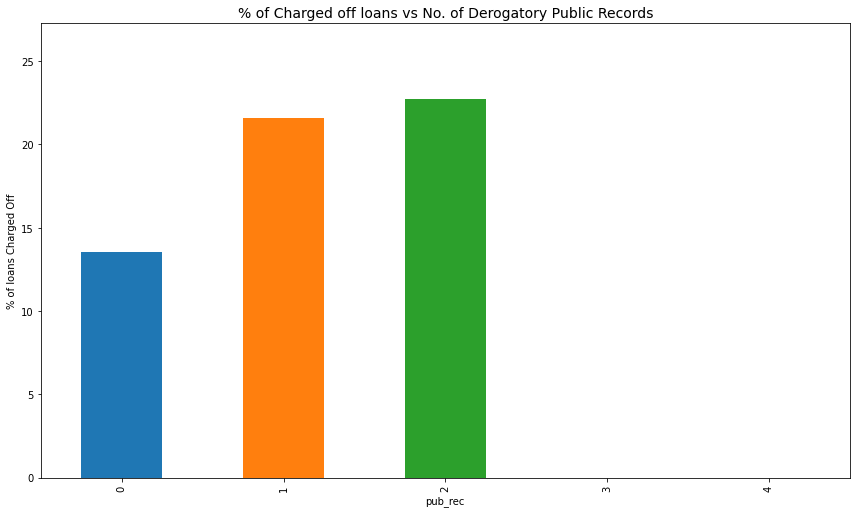

In [514]:
# 2) Segmented Univariate Analysis

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'pub_rec')
plt.title('% of Charged off loans vs No. of Derogatory Public Records',fontsize =14)
plt.show()

In [515]:
# The risk of defaults is higher for loan takers with even 1 past Derogatory Public Record.

In [516]:
# This seems to be a strong indicator for determining defaulters.

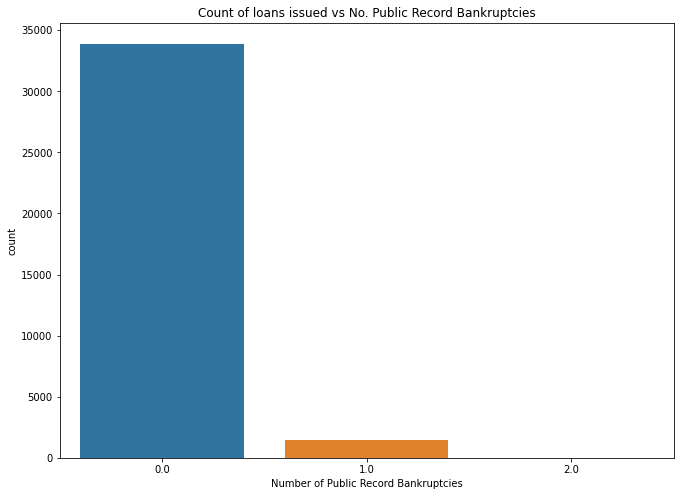

In [517]:
# `pub_rec_bankruptcies`

# 1) Univariate Analysis 

loan.pub_rec_bankruptcies.value_counts(normalize=True)

plt.figure(figsize=(11,8))
sns.countplot(loan['pub_rec_bankruptcies'])
plt.title('Count of loans issued vs No. Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.show()

In [518]:
# Lending club mostly issue loans to those who have no Public Records of Bankruptcies. At most 1 such record is considered in some cases but rarely more than 1.

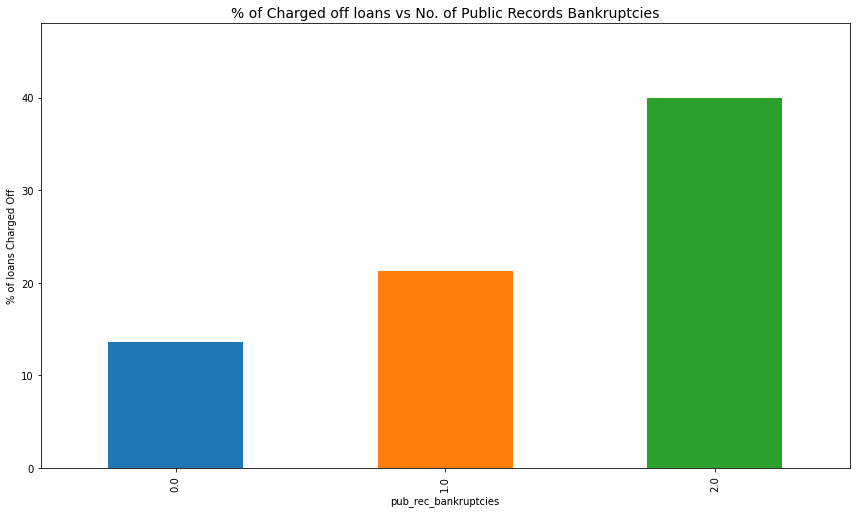

In [519]:
# 2) Segmented Univariate Analysis

plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'pub_rec_bankruptcies')
plt.title('% of Charged off loans vs No. of Public Records Bankruptcies',fontsize =14)
plt.show()

In [520]:
# The risk of defaults is higher for loan takers with even 1 past Public Record of Bankruptcy.

In [521]:
# This seems to be a strong indicator for determining defaulters.

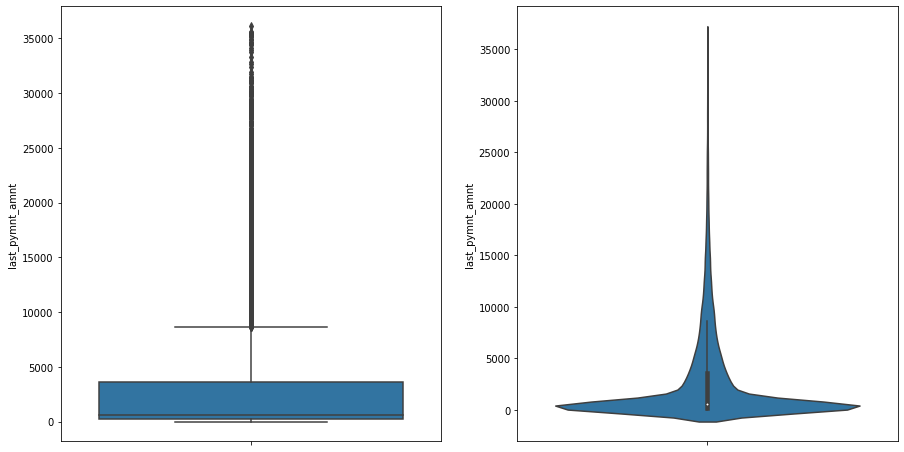

In [522]:
# `last_pymnt`

# 1) Univariate Analysis

loan.last_pymnt_amnt.describe()

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'last_pymnt_amnt',data=loan)

plt.subplot(1, 2, 2)
sns.violinplot(y = 'last_pymnt_amnt',data=loan)
plt.show()

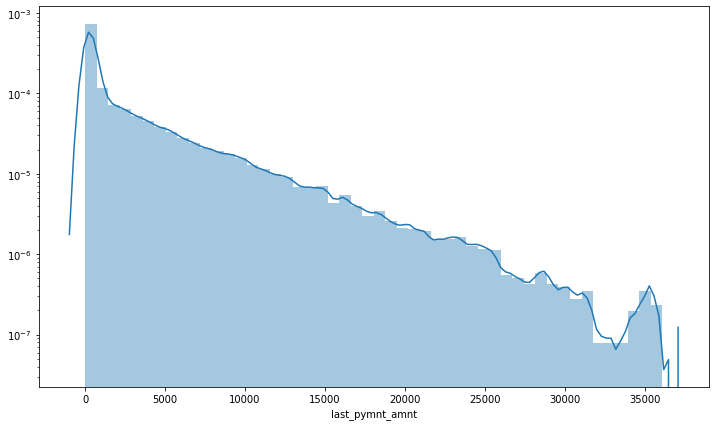

In [523]:
# Distribution plot
plt.figure(figsize=(12,7))
sns.distplot(loan.last_pymnt_amnt)
plt.yscale('log')

plt.show()

In [524]:
# Last payment amount can have huge variation.

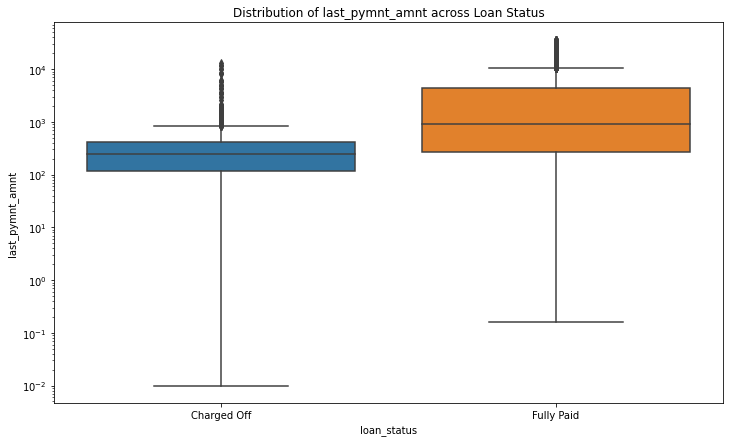

In [525]:
# 2) Segmented Univariate Analysis

loan.groupby('loan_status')['last_pymnt_amnt'].describe()

plt.figure(figsize=(12,7))
sns.boxplot(y=loan['last_pymnt_amnt'], x=loan['loan_status'], data=loan)
plt.title('Distribution of last_pymnt_amnt across Loan Status')
plt.yscale('log')

plt.show()

In [526]:
#We can see that the last payment amount is Significantly lower for Charged off loans compared to Fully Paid loans.
#We can thus conclude that this is a critical column to determine defaulters.

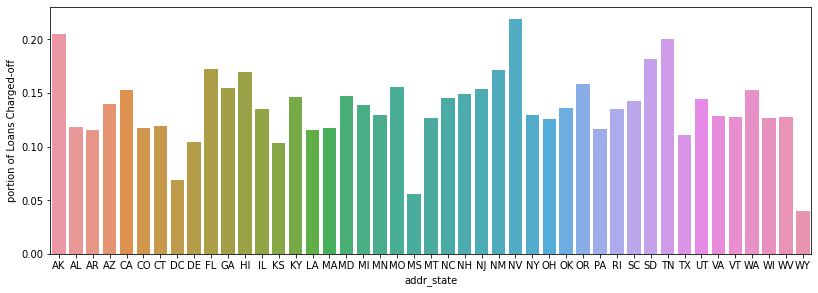

In [527]:
#addr_state

#Univariate:

charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
plt.show()

In [528]:
# from the above plot, it appears that most of the loans that produced defaulters had their applicants come from the state of 
# Nevada. Arkansas and Tennessee and those that had the least chances of producing defaulters were from the states of Wyoming, 
# Mississippi and Washington DC with all the other states and their likelihood of producing a defaulting loan applicant falling
# somewhere in the middle of these two extremes. 

C:\Users\sidkr\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sidkr\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sidkr\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\sidkr\anaconda3\lib\site-packages\pandas\plotting\_matpl

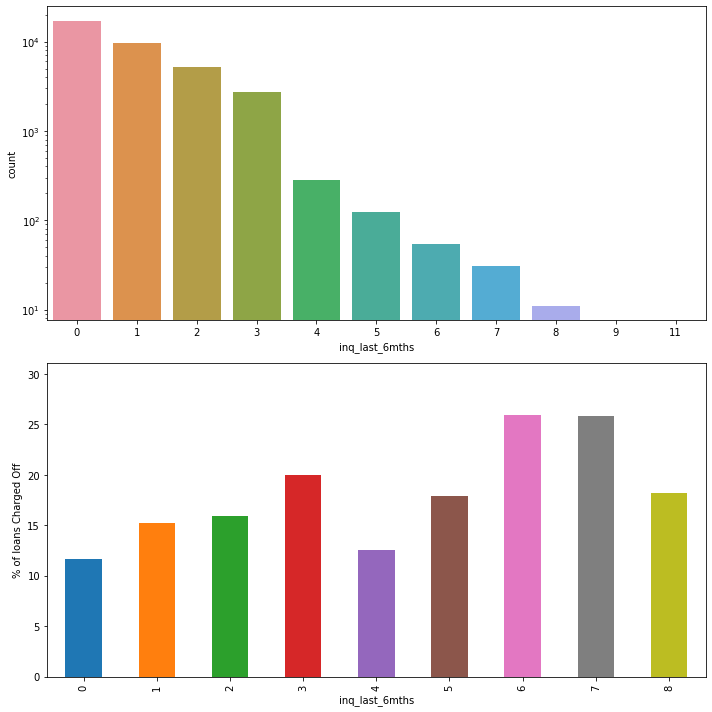

In [529]:
#inq_last_6mths

# Univariate 

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(loan['inq_last_6mths'], order=sorted(loan.delinq_2yrs.unique()))
c.set_yscale('log')

# Bivariate

plt.subplot(2, 1, 2)
perc_loan_chargedoff(loan, 'inq_last_6mths')
plt.show()

In [530]:
# we can observe from the analysis that more the inquiries done into the credit score of a loan applicant, more his chances of 
# becoming a defaulter but it is not a straight observation since the frequency of inquiries go up to 3 and then dip down to rise 
# again uniformly and then dip again at 8. Nothing conclusive can be thus drawn from it. 

C:\Users\sidkr\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='revol_bal', ylabel='loan_status'>

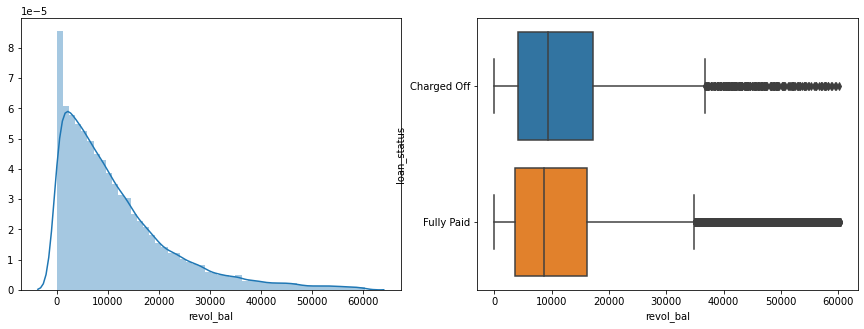

In [531]:
#revol_bal

# Univariate

loan.revol_bal.describe()
loan = loan[np.abs(loan.revol_bal-loan.revol_bal.mean()) <= (3*loan.revol_bal.std())]
loan['revol_bal_log'] = loan['revol_bal'].apply(lambda x : np.log(x+1))
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(loan['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan['revol_bal'], y=loan['loan_status'], data=loan)

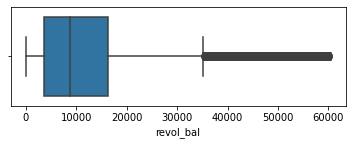

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,12453.837382,11330.139812,0.0,4161.0,9336.5,17212.5,60071.0
Fully Paid,29739.0,11641.208884,10974.614732,0.0,3612.0,8581.0,16138.5,60376.0


In [532]:
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=loan['revol_bal'], data=loan)
plt.show()
loan.groupby('loan_status')['revol_bal'].describe()
#There is no large difference in revolving balance mean for charged off an fully Paid loans

In [533]:
# in the case of revol_bal there is hardly any significant difference for both the loan status that is fully_paid and charged_off

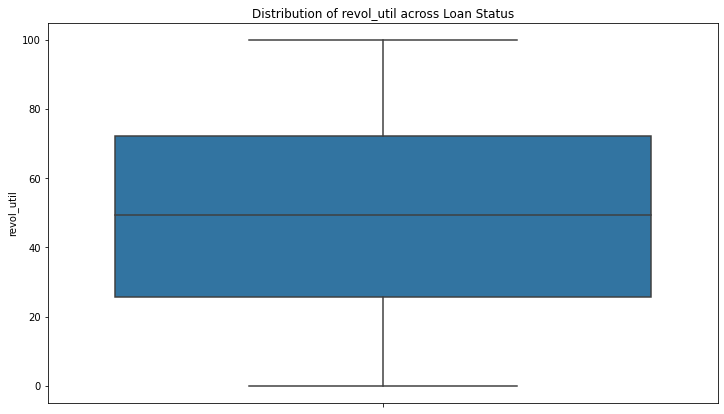

In [534]:
#revol_util	

# Univariate

loan.revol_util.describe()
plt.figure(figsize=(12,7))
sns.boxplot(y=loan['revol_util'], data=loan)
plt.title('Distribution of revol_util across Loan Status')
plt.show()

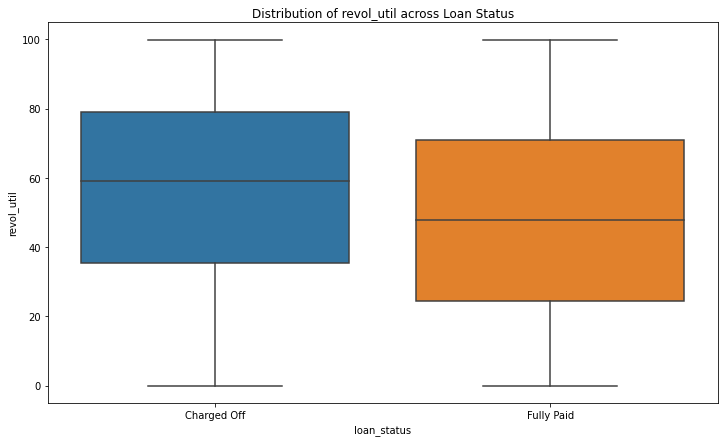

In [535]:
# Segmented Univariate
loan.groupby('loan_status')['revol_util'].describe()
plt.figure(figsize=(12,7))
sns.boxplot(y=loan['revol_util'], x=loan['loan_status'], data=loan)
plt.title('Distribution of revol_util across Loan Status')
plt.show()

C:\Users\sidkr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


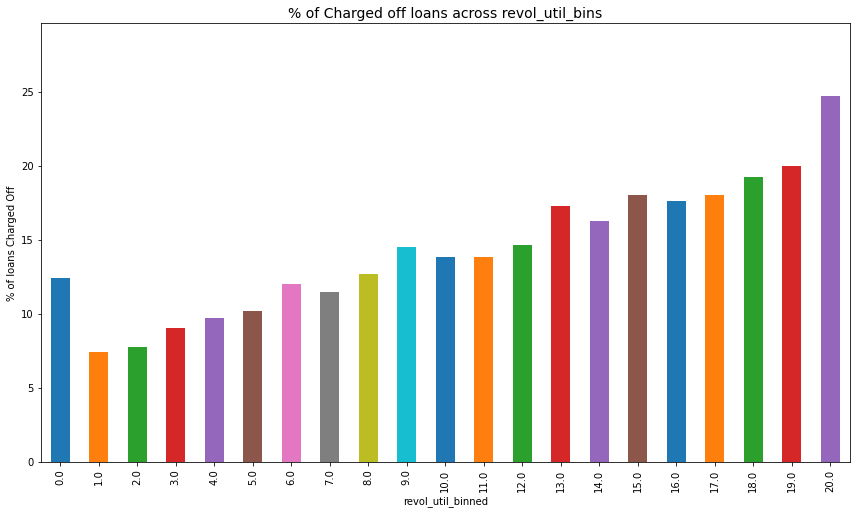

In [536]:
# seem higher for the Charged off loans
loan['revol_util_binned'] = round(loan['revol_util']/5)
plt.figure(figsize=(12,7))
perc_loan_chargedoff(loan, 'revol_util_binned')
plt.title('% of Charged off loans across revol_util_bins',fontsize =14)
plt.show()

In [537]:
# % Charged_off increases as Revol util increases

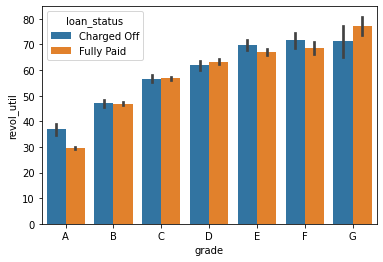

In [538]:
# Bivariate
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan, estimator=np.mean,order=sorted(loan.grade.unique()))
plt.show()

In [539]:
# we see that revol increases as we go from higher grade (A) to lower grade (G)

<Figure size 1080x360 with 0 Axes>

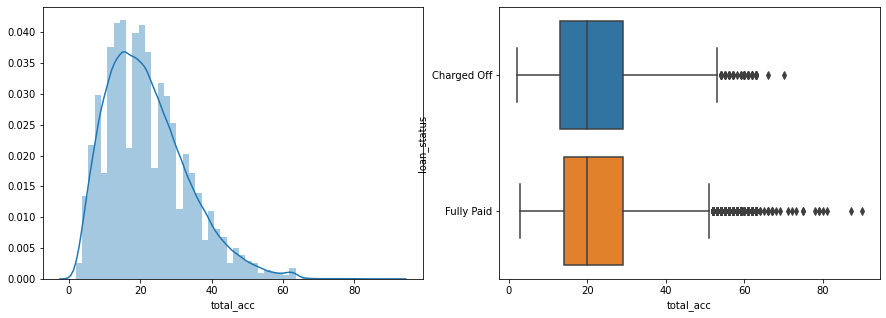

In [540]:
#total_acc	
# Univariate
plt.figure(figsize=(15,5))
plot_distribution(loan, 'total_acc')

In [541]:
# The are approx. 22 average credit lines for the borrower's.
# There is no big difference between the Charged Off and Fully Paid credit lines

In [542]:
#out_prncp	
# Univariate
loan.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [543]:
# in the above observation we see that most of the values are zero so we can ignore/drop column out_prncp

<Figure size 1080x360 with 0 Axes>

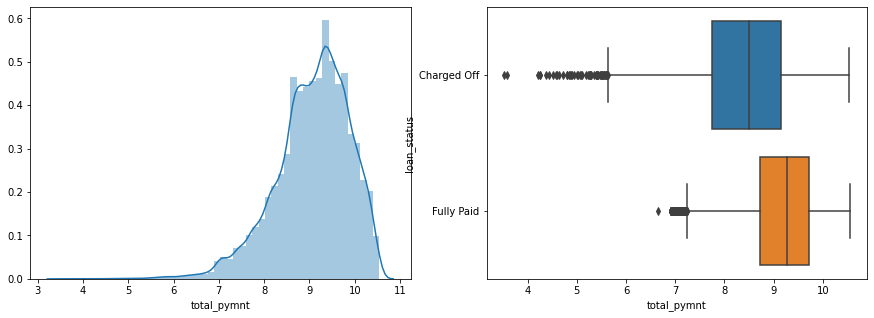

In [544]:
#total_pymnt
# Univariate and Bivariate
loan.total_pymnt.describe()
loan = loan[np.abs(loan.total_pymnt-loan.total_pymnt.mean()) <= (3*loan.total_pymnt.std())]
loan['total_pymnt'] = loan['total_pymnt'].apply(lambda x : np.log(x))
plt.figure(figsize=(15,5))
plot_distribution(loan, 'total_pymnt')
plt.show()

In [545]:
# we see that the total payments received fr the charged off loans are more than those for the loans that have been fully paid. There is nothing beyond obvious in this observation so we cannot draw any insight from it. 

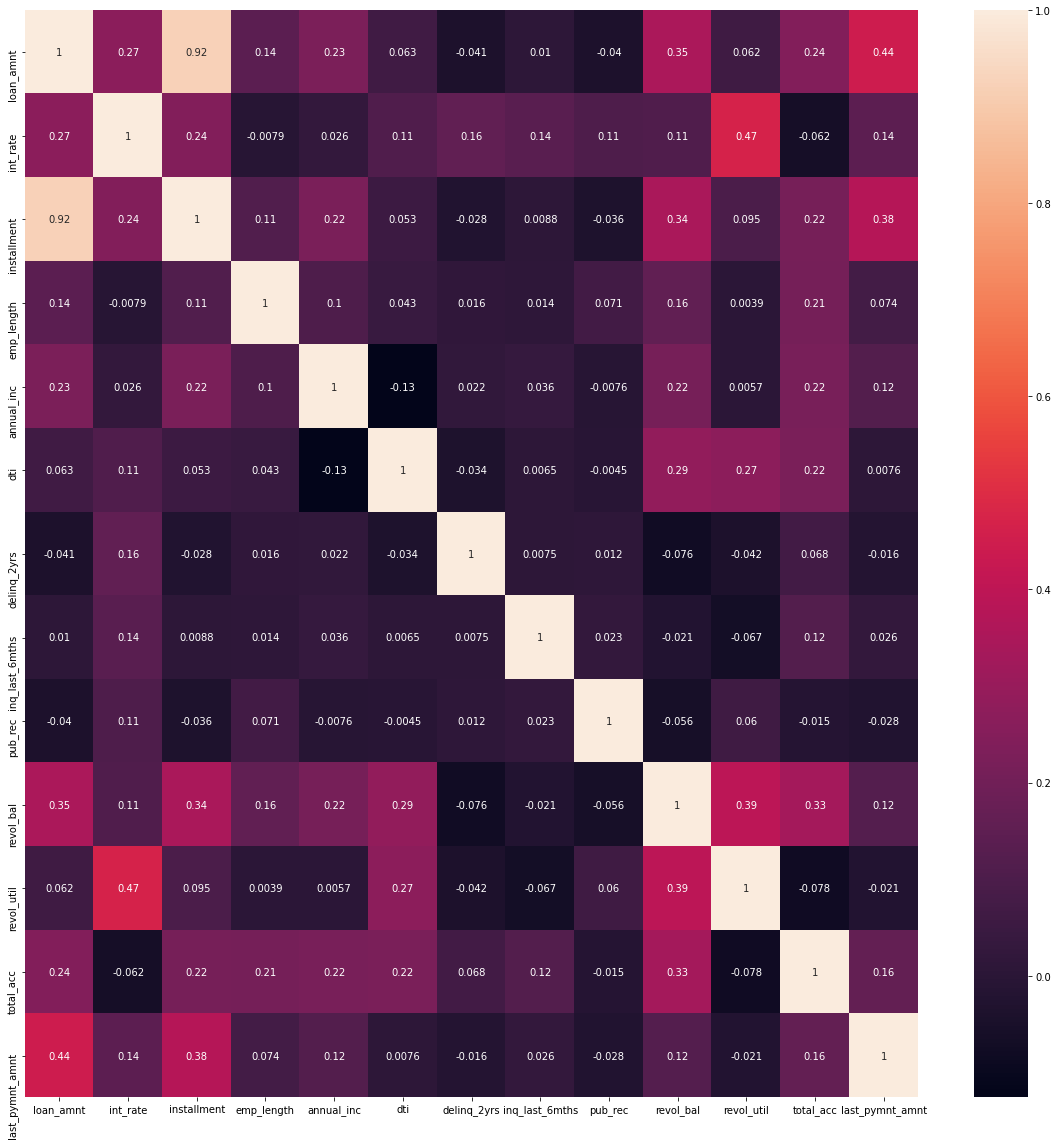

In [546]:
# HEATMAP TO FIND CORRELATION BETWEEN MULTIPLE COLUMNS

plt.figure(figsize=(20,20))
var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt',
       ]
corr = loan[var].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [547]:
# revol_util and int_rate have a high correlation which is a good factor (seen from heatmap.

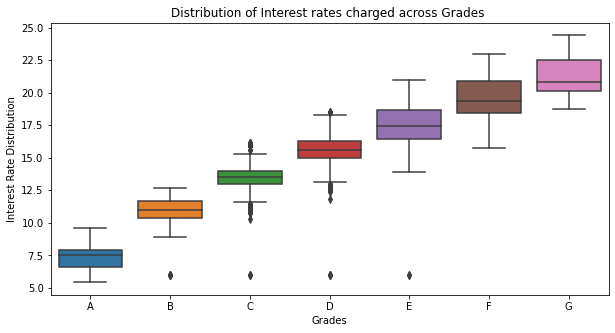

In [548]:
# Bivariate Analysis

# Rate of interest vs Grade
plt.figure(figsize=(10,5))
sns.boxplot(x='grade',y='int_rate',data=loan,order=sorted(loan.grade.unique()))
plt.title('Distribution of Interest rates charged across Grades ')
plt.xlabel('Grades')
plt.ylabel('Interest Rate Distribution')
plt.show()

In [549]:
# Here, we can see that the interest rates keeps increasing as we move from Grade A (higher grade) to Grade G (lower grade)

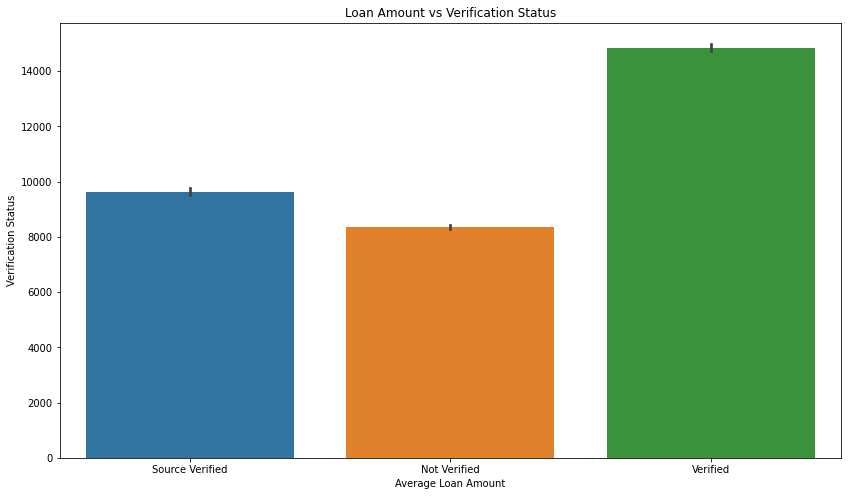

In [550]:
plt.figure(figsize=(14,8))
sns.barplot(x='verification_status', y='loan_amnt', data=loan, estimator=np.mean)
plt.title('Loan Amount vs Verification Status')
plt.xlabel('Average Loan Amount')
plt.ylabel('Verification Status')
plt.show()

In [551]:
# As expected, loans with higher loan amount and verified more often.

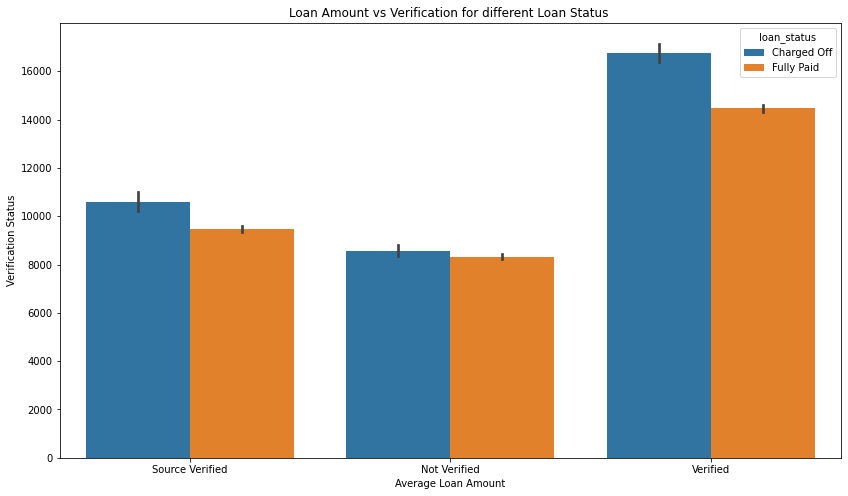

In [552]:
# Multivariate Analysis

plt.figure(figsize=(14,8))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.title('Loan Amount vs Verification for different Loan Status ')
plt.xlabel('Average Loan Amount')
plt.ylabel('Verification Status')
plt.show()